In [1]:
import sys, re, os
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [7]:
chdir = True

In [8]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

In [9]:
# Some helper functions
def get_stat(stat_name, source="general/fastclick-varied-cbr-rates.csv", index=1):
    stat = []
    with open(source) as file:
        for line in file:
            if re.search(stat_name, line):
                stat.append(line.strip().split(',')[index])
    
    return list(map(lambda x:float(x), stat[:-1]))

def plot_stat(stat_name, ax, source, index=1):
    stat = get_stat(stat_name, source, index)
    ax.plot(stat)
    ax.grid(True)
    ax.set_title(stat_name)

def plot_stats(stat_names, source="fastclick-varied-cbr-rates.csv", index=1):
    i = 1
    fig, ax = plt.subplots(len(stat_names),2)
    for s in stat_names:
        ax = plt.subplot(len(stat_names),1, i)
        plot_stat(s, ax, source, index)
        i+=1
    fig.tight_layout()
    

# Service chain configuration

In [10]:
from IPython.display import IFrame
IFrame("../assets/testbed.pdf", width=600, height=420)

In [15]:
# Metadata for specific SFC configurations
exp_ls = "exp10" 
exp_ls = 'random_rates'
exp_rs = "exp-4-1-1"
vnfs = ["firewall.csv", "nf_router.csv", "ndpi_stats.csv", "payload_scan.csv", "bridge.csv"]

# Load stimulus experiments

## High-level KPIs:


In [19]:
def parse_seq(exp_type, exp_num, file, index=5):
    "Parse sequential data, specialized for the TX/RX/Latency experiments"
    tmp = []
    
    if file.startswith("latency.csv"):
        with open(os.path.join(exp_type, exp_num, file)) as f:
            lines = f.readlines()[4:] if exp_type == "load_stimulus" else f.readlines()
            for line in lines:
                tmp.append(float(line.strip())/1000)
    else:
        with open(os.path.join(exp_type, exp_num, file)) as f:
            next(f)
            for l in f:
                tmp.append(float(l.strip().split(",")[index]))
                
    return tmp

In [20]:
def parse_reg(exp_type, exp_num, file, stat_name, index=1):
    "Parse the Perf data"
    stat = []
    with open(os.path.join(exp_type, exp_num, file)) as file:
        for line in file:
            if re.search(stat_name, line):
                stat.append(line.strip().split(',')[index])
    
    return list(map(lambda x:float(x), stat[:-1]))

FileNotFoundError: [Errno 2] No such file or directory: 'load_stimulus\\random_rates\\tx_stats.csv'

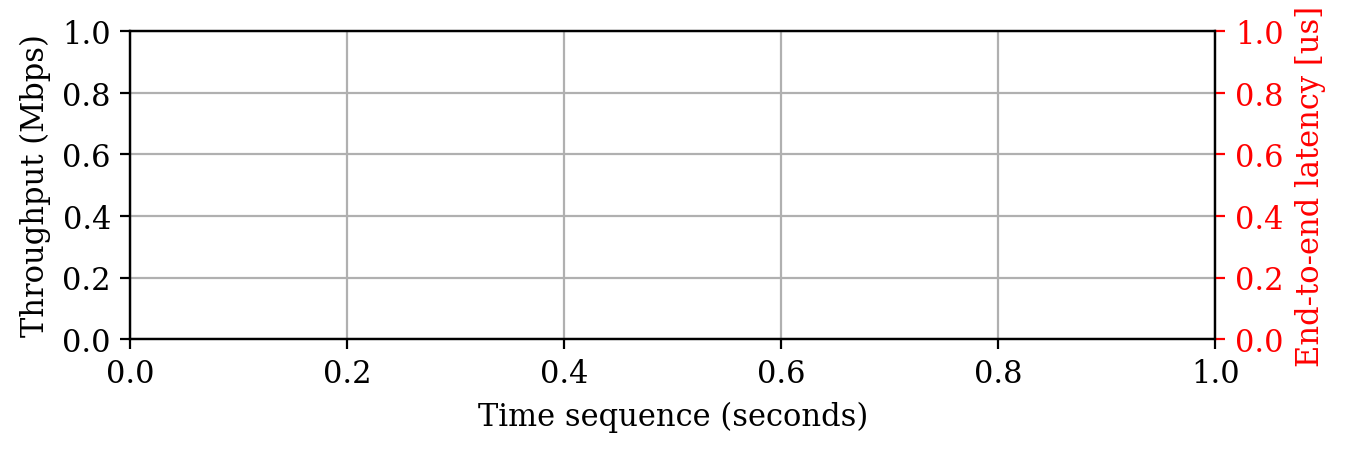

In [18]:
fig, ax = plt.subplots(figsize = (7,2))
ax.grid(True)
ax.set_xlabel("Time sequence (seconds)")
ax.set_ylabel("Throughput (Mbps)")

ax2 = ax.twinx()
ax2.tick_params(axis='y', colors='red')
ax2.set_ylabel("End-to-end latency [us]", color="red")

l = ax.plot(parse_seq("load_stimulus", exp_ls, "tx_stats.csv"), marker=next(marker), color=next(cycol), label="TX")
l1 = ax.plot(parse_seq("load_stimulus", exp_ls, "rx_stats.csv"), color=next(cycol), label="RX rate")
lat = parse_seq("load_stimulus", exp_ls, "latency.csv")
ax2.set_yscale("log")
l2 = ax2.plot(0.5*np.arange(0, len(lat)), lat, color="yellow", label="Latency")

lns = l1 + l2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs)

In [11]:
def init_plt(ax2_title):
    fig, ax = plt.subplots(figsize = (7,2))
    ax.grid(True)
    ax.set_xlabel("Time sequence (seconds)")
    ax.set_ylabel("Throughput (Mbps)")

    ax2 = ax.twinx()
    ax2.tick_params(axis='y', colors='red')
    ax2.set_ylabel(ax2_title, color="red")
    
    return fig, ax, ax2

In [22]:
def plot_feature(feature, label, index=1):
    fig, ax, ax2 = init_plt(label)
    tx = parse_seq("load_stimulus", exp_ls, "tx_stats.csv")
    lns = ax.plot(tx, marker=next(marker), color=next(cycol), label="TX")

    for v in vnfs:
        data = parse_reg("load_stimulus", exp_ls, v, feature, index)
        lns += ax2.plot(data, color=next(cycol), label=v.split(".")[0])

    labs = [l.get_label() for l in lns]
    plt.legend(lns, labs, loc=1, bbox_to_anchor=(1, 1.2), ncol=6, prop={'size': 7})

In [23]:
plot_feature("instructions", "Instructions/sec")

NameError: name 'init_plt' is not defined

In [24]:
plot_feature("branches,", "M/sec", 7)

NameError: name 'init_plt' is not defined

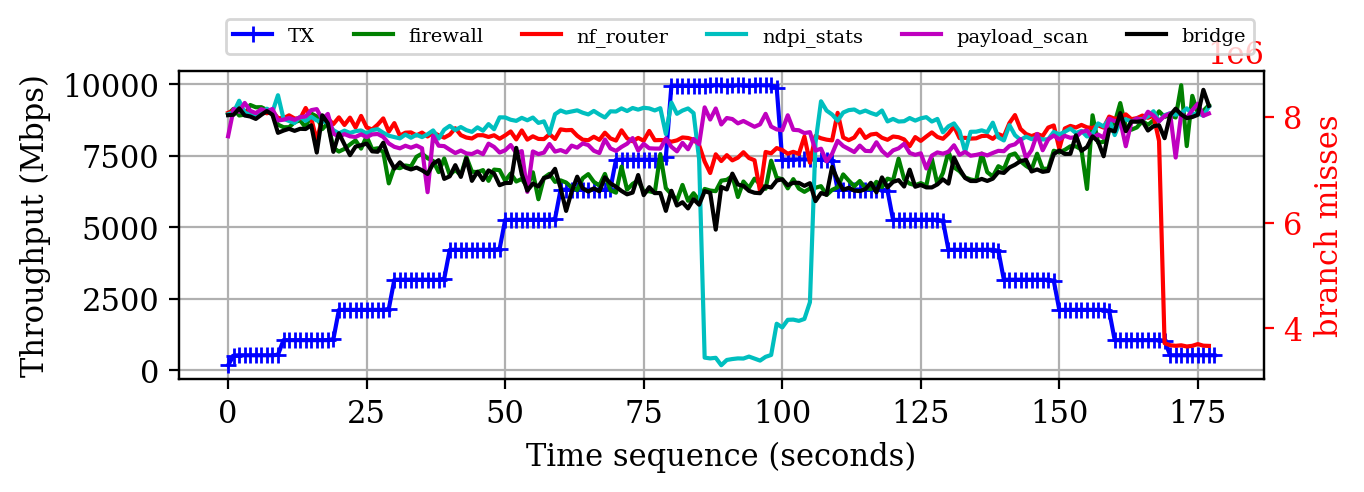

In [15]:
plot_feature("branch-misses,", "branch misses")

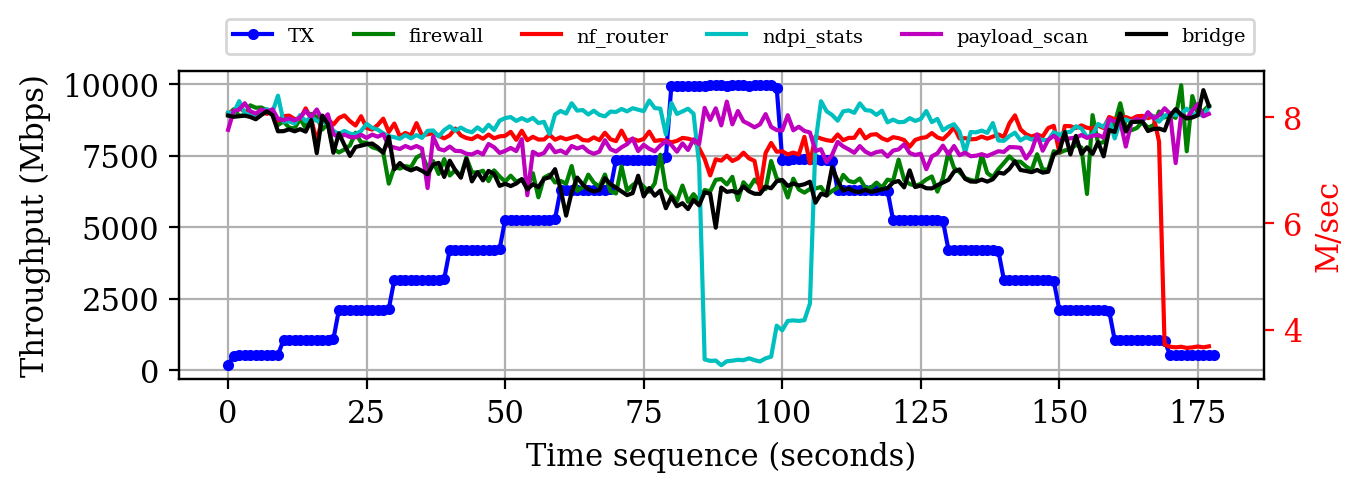

In [16]:
plot_feature("branch-load-misses,", "M/sec", 7)

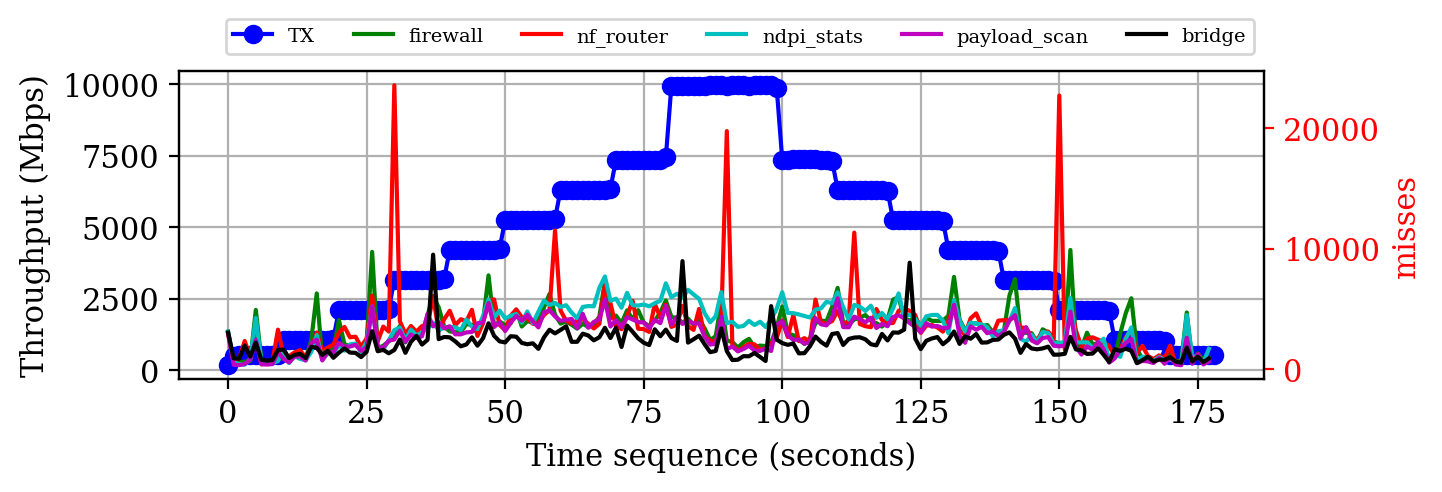

In [17]:
plot_feature("cache-misses", "misses", )

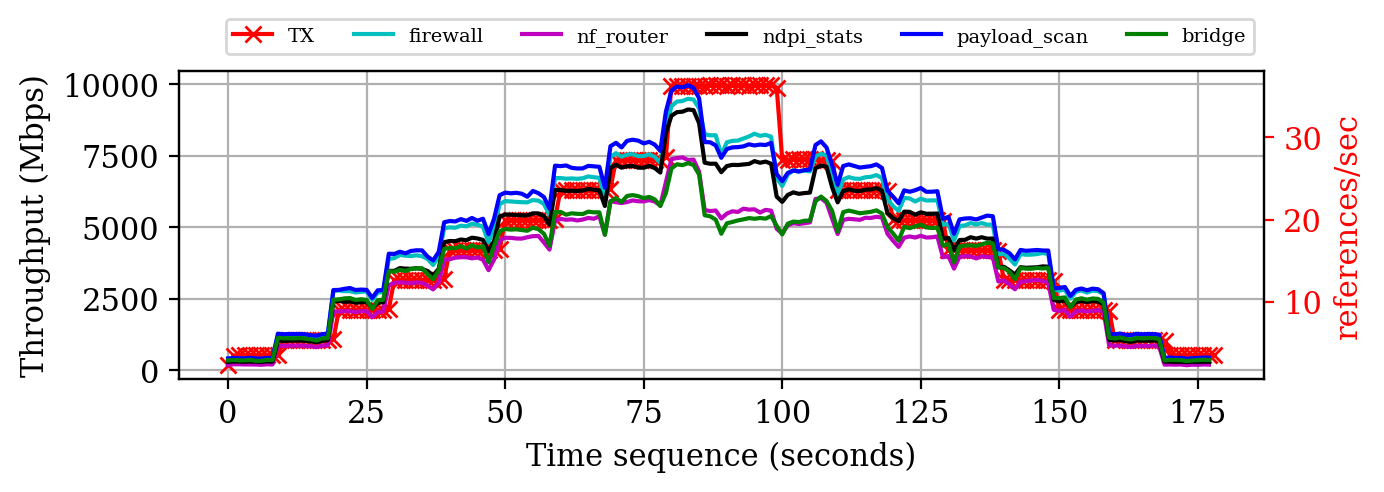

In [19]:
plot_feature("cache-references", "references/sec", 7)

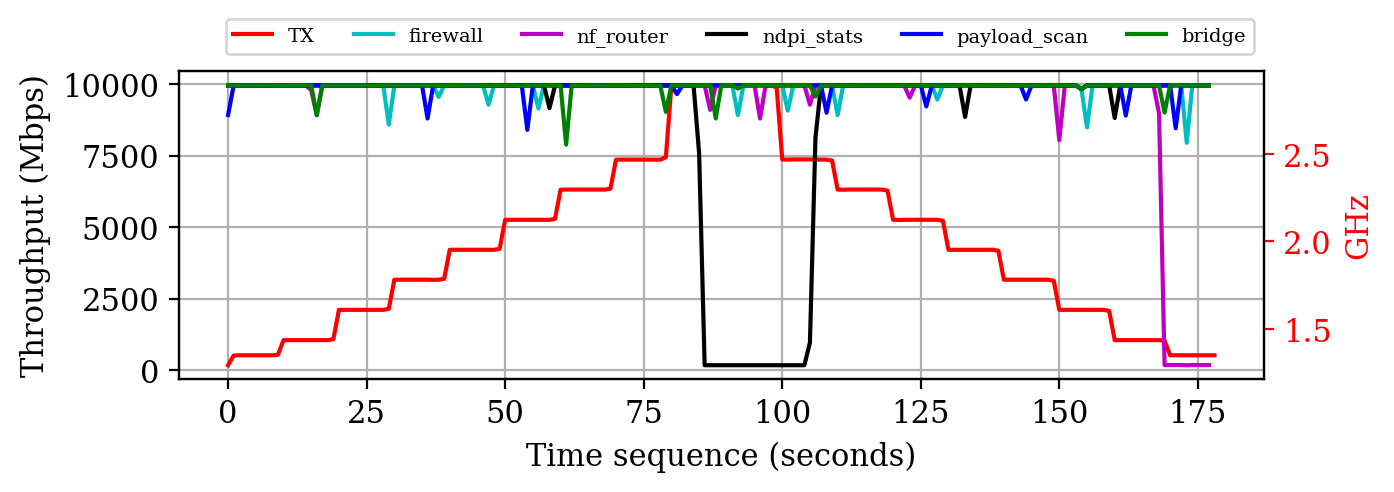

In [20]:
plot_feature(",cycles,", "GHz", 7)

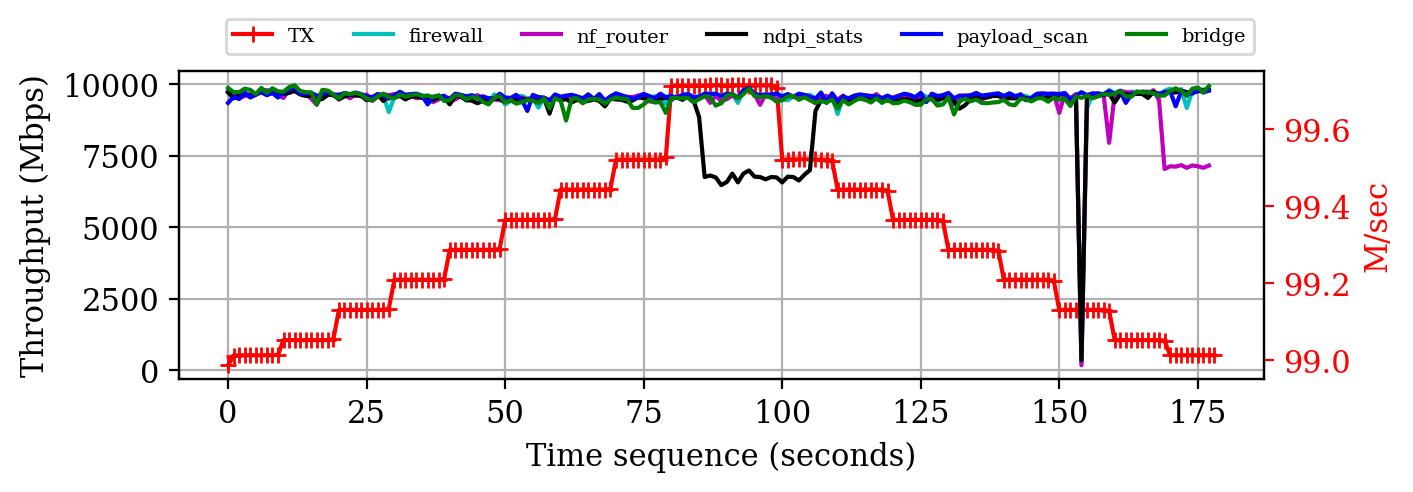

In [21]:
plot_feature("bus-cycles", "M/sec", 7)

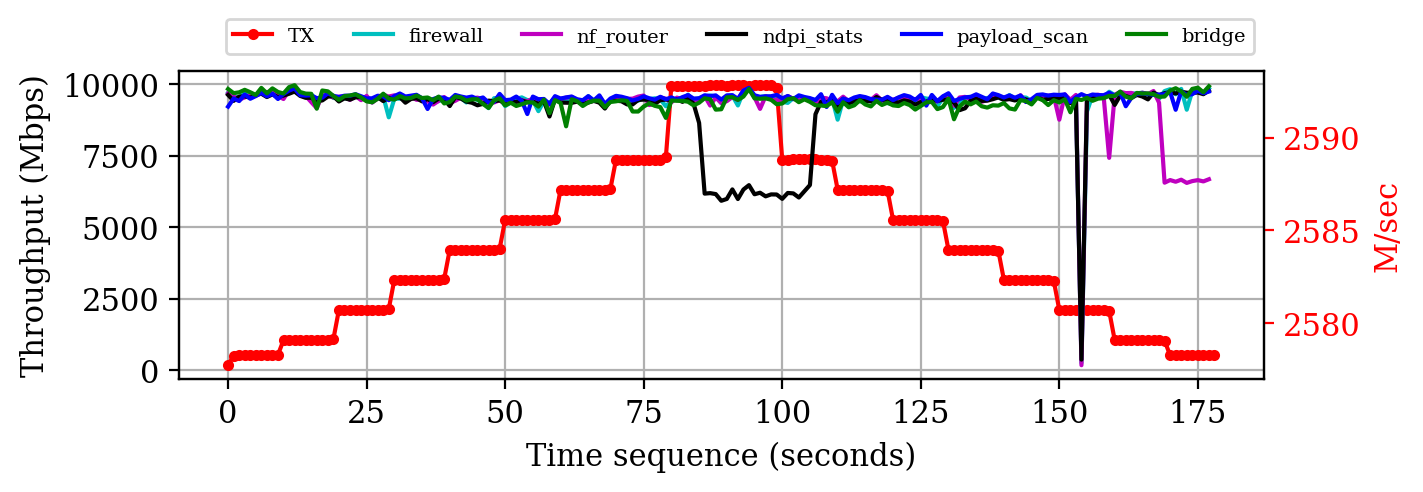

In [22]:
plot_feature("ref-cycles", "M/sec", 7)

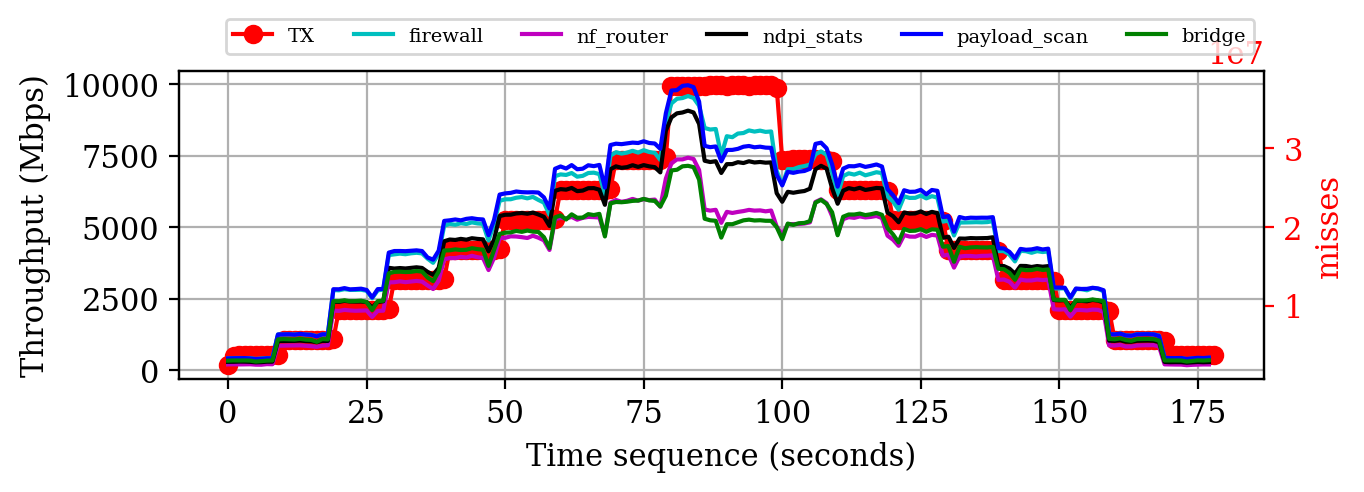

In [23]:
plot_feature("L1-dcache-load-misses", "misses")

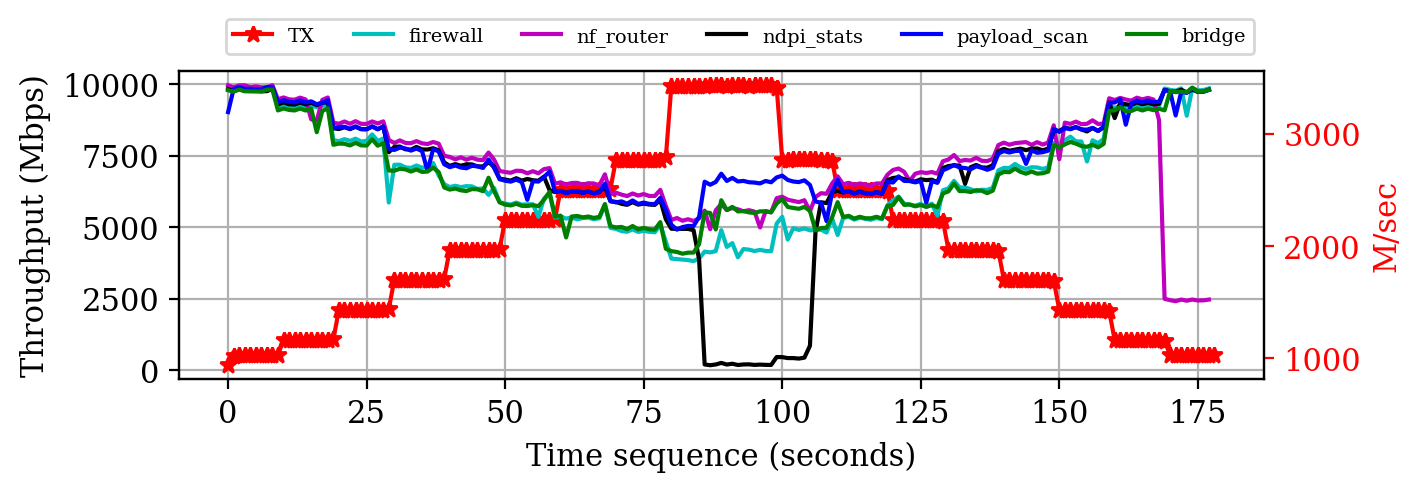

In [24]:
plot_feature("L1-dcache-loads", "M/sec", 7)

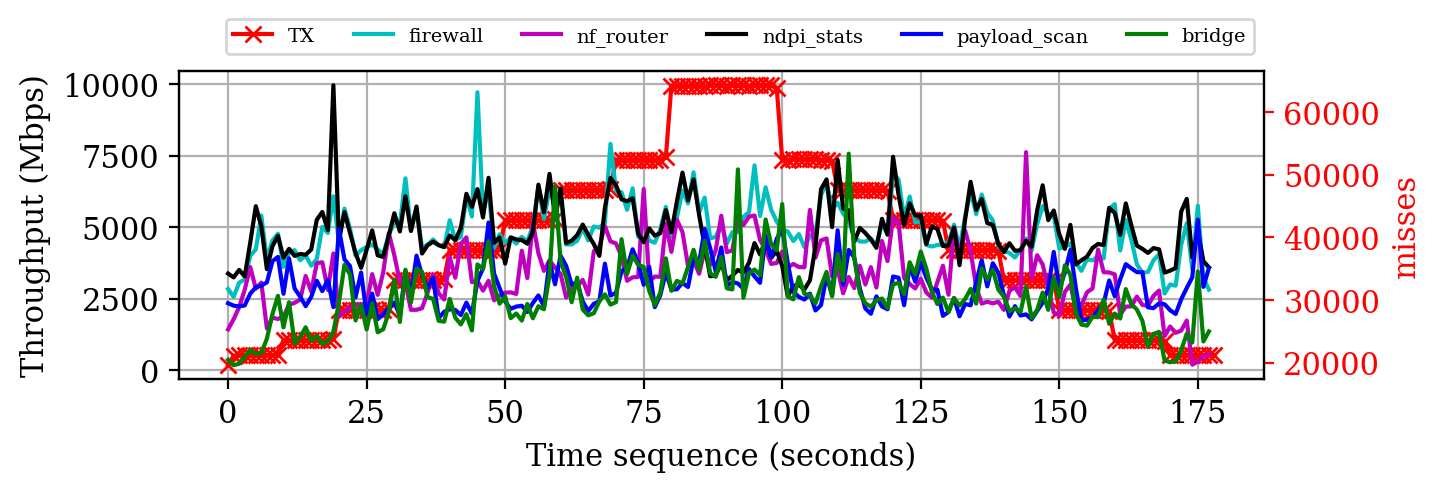

In [25]:
plot_feature("L1-icache-load-misses", "misses", )

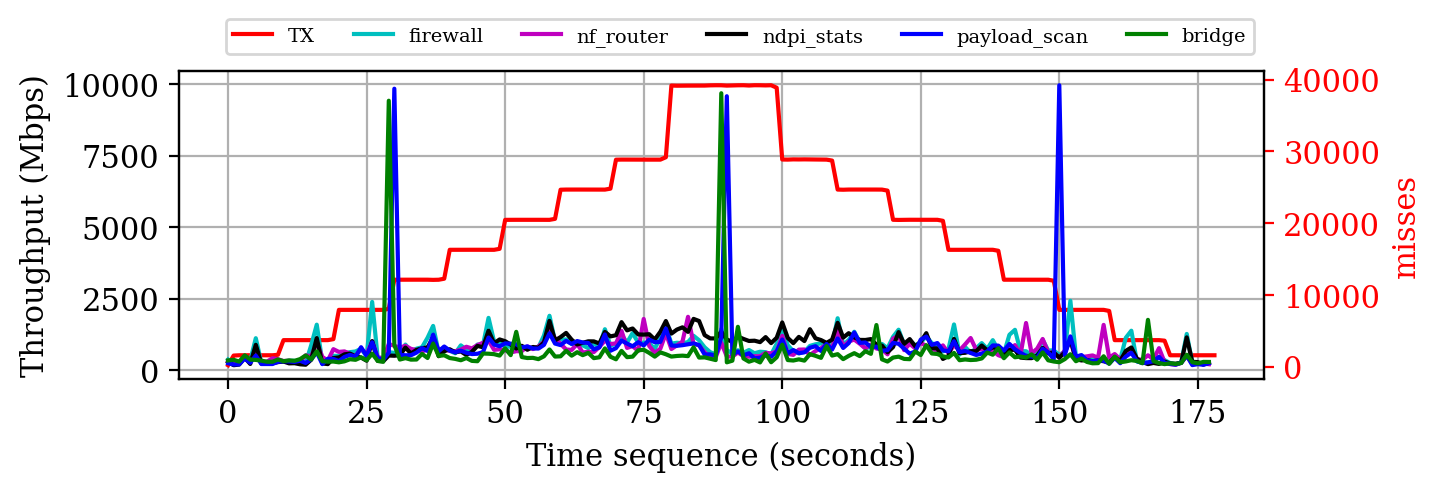

In [26]:
plot_feature("LLC-load-misses", "misses", )

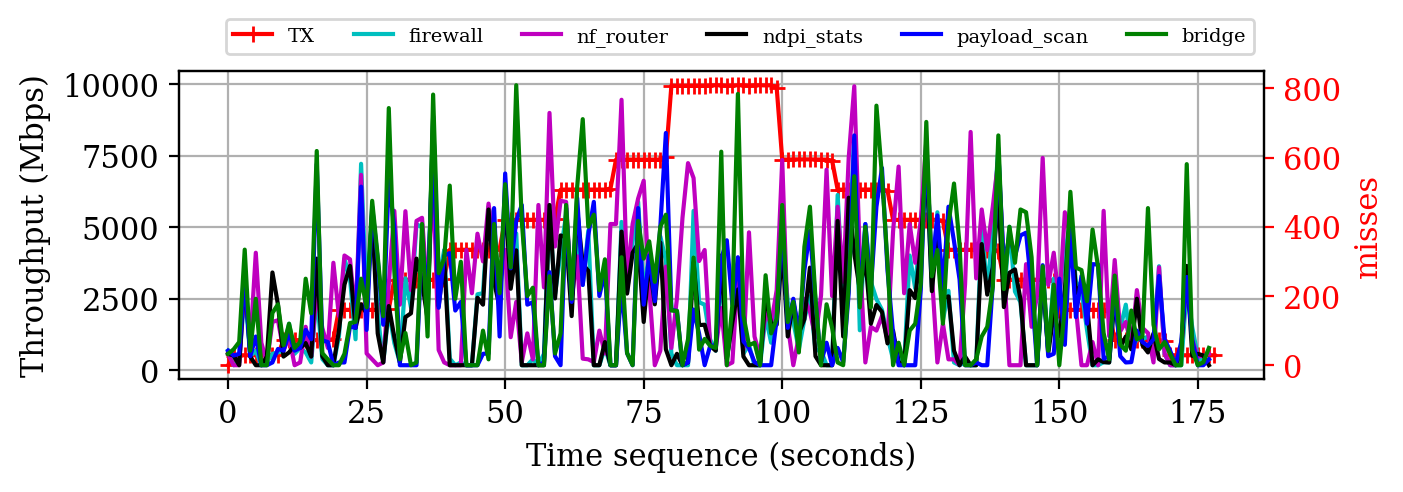

In [27]:
plot_feature("LLC-store-misses", "misses", )

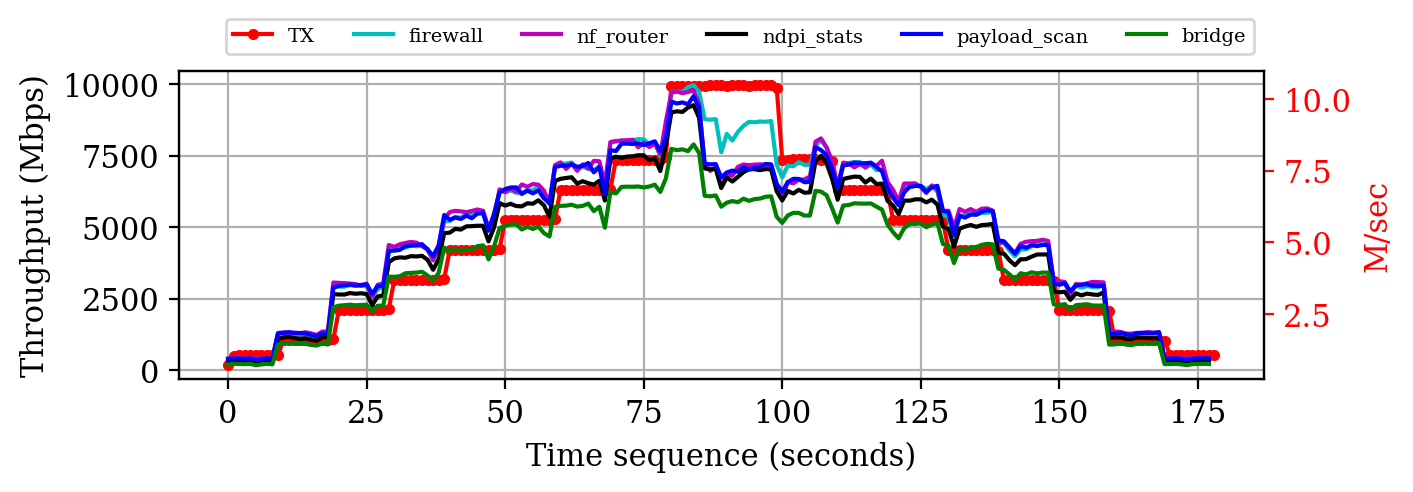

In [28]:
plot_feature("LLC-stores", "M/sec", 7)

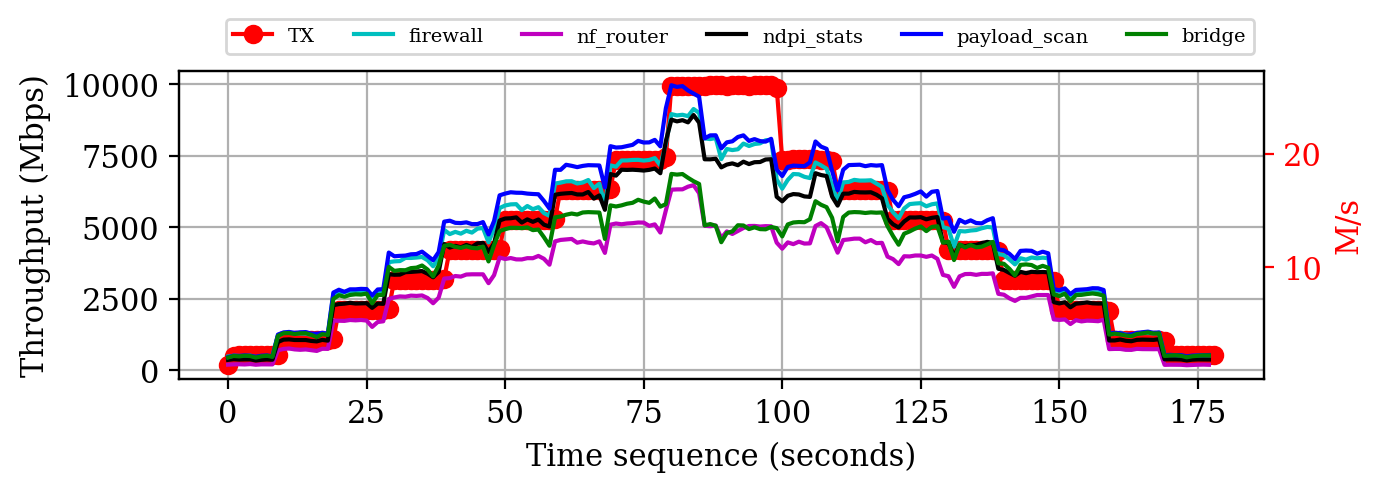

In [29]:
plot_feature("LLC-loads", "M/s", 7)

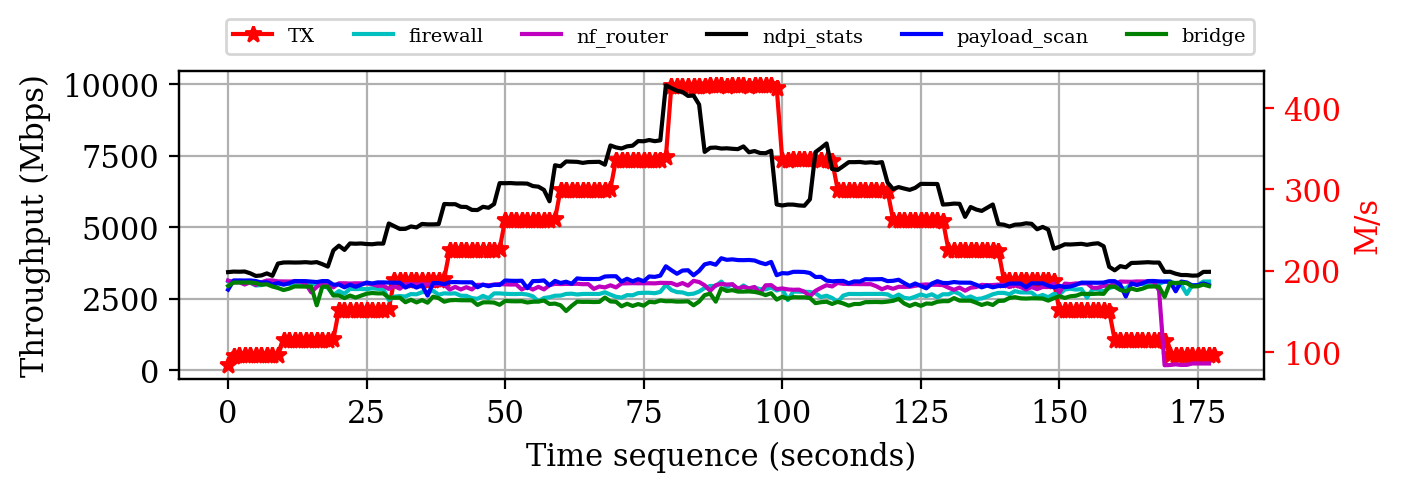

In [30]:
plot_feature("dTLB-stores", "M/s", 7)

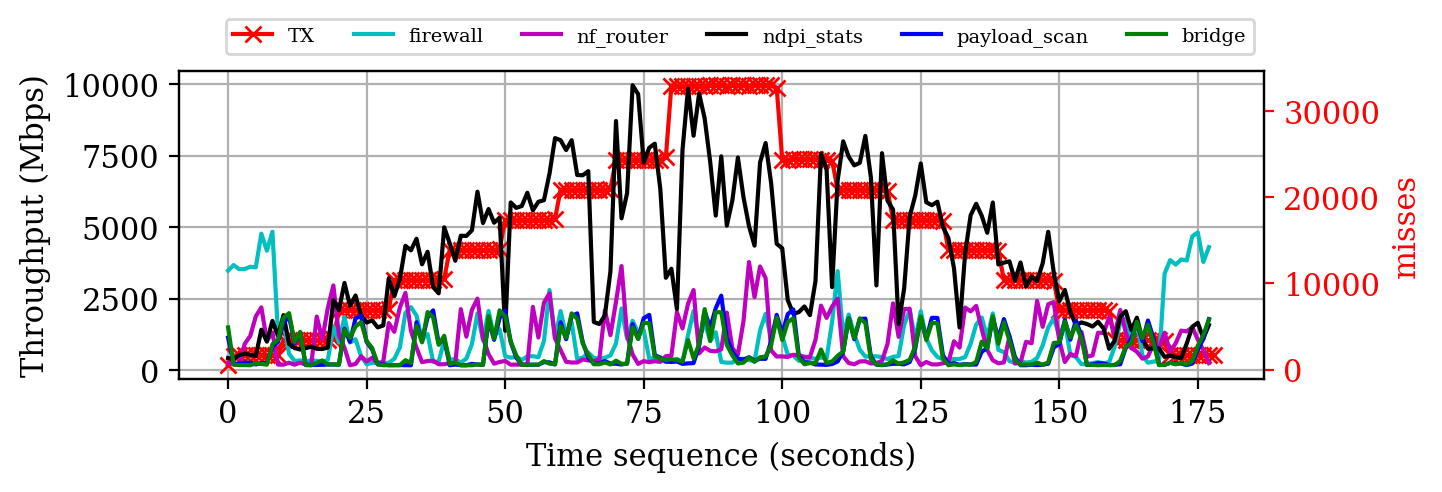

In [31]:
plot_feature("dTLB-load-misses", "misses",)

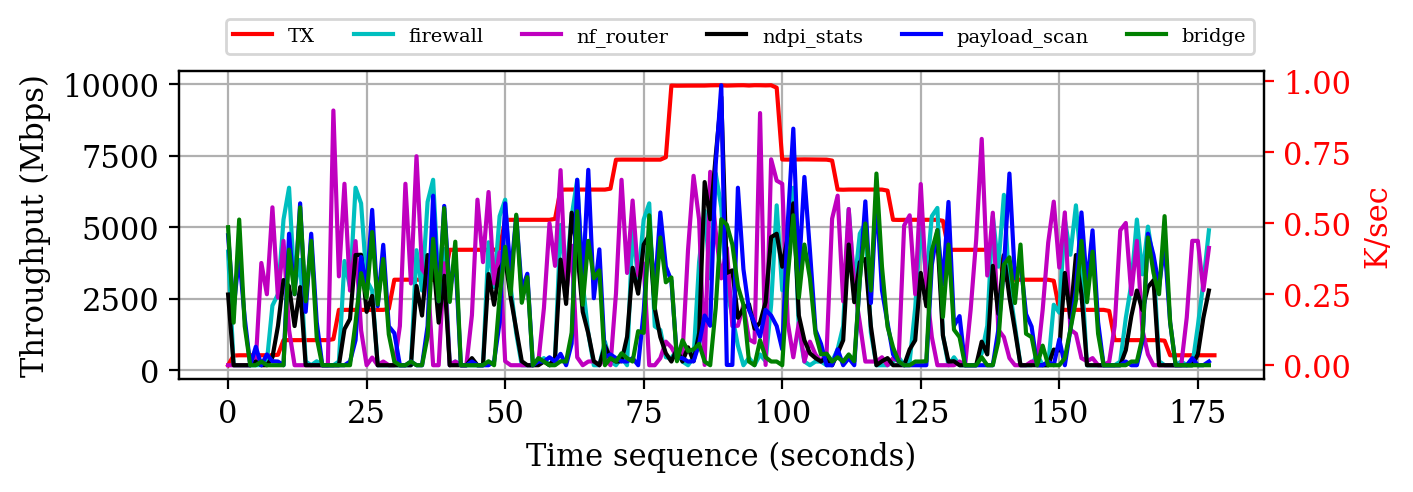

In [32]:
plot_feature("dTLB-store-misses", "K/sec", 7)

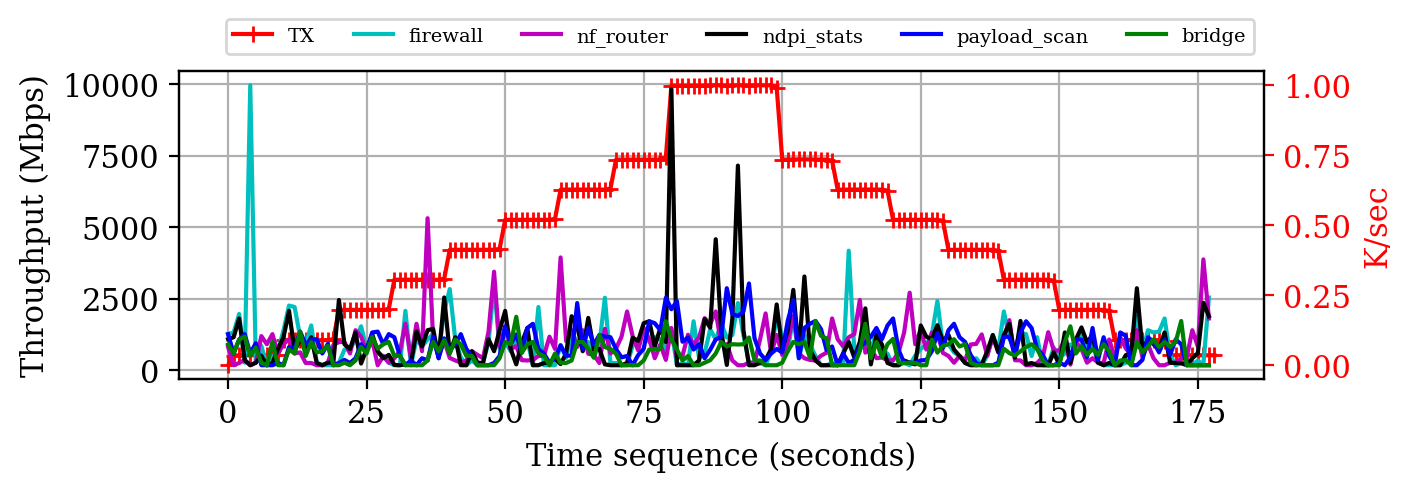

In [33]:
plot_feature("iTLB-loads", "K/sec", 7)

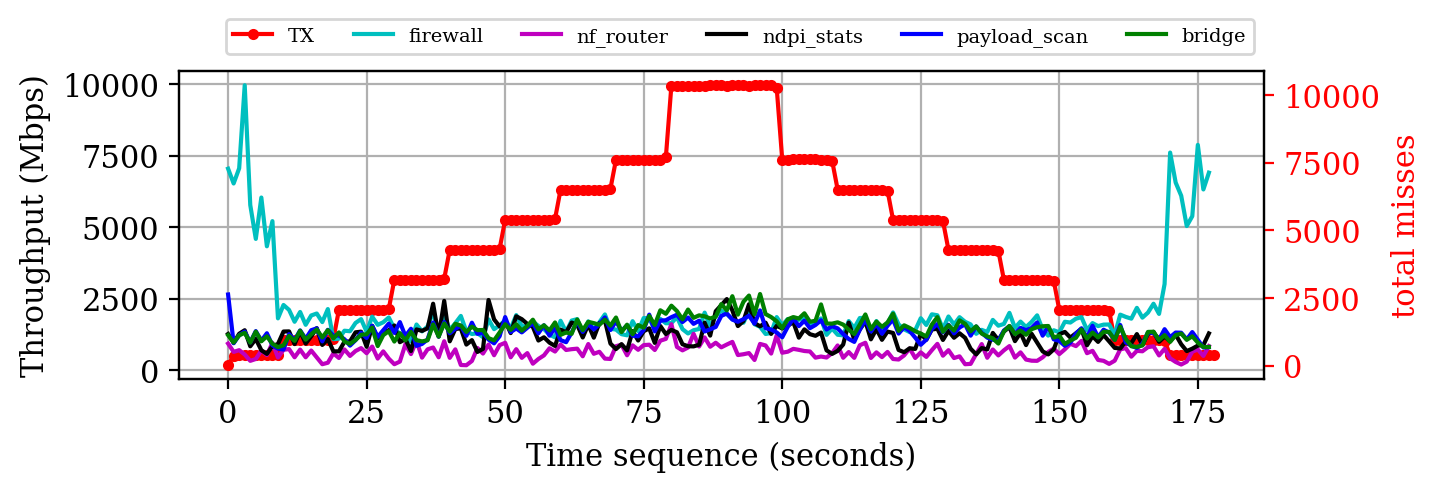

In [34]:
plot_feature("iTLB-load-misses", "total misses",)

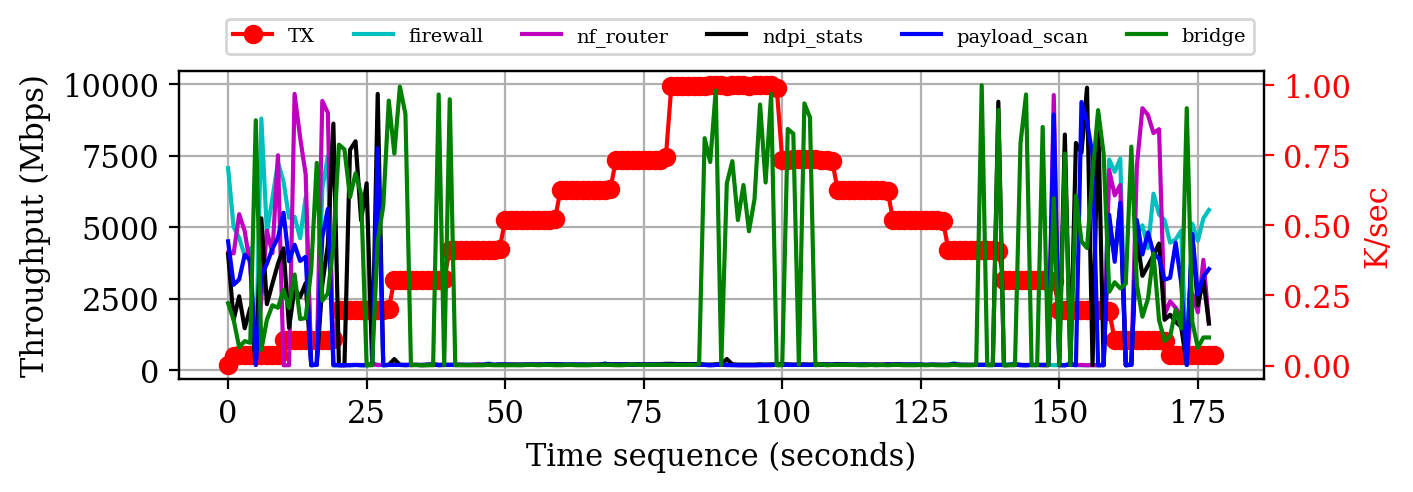

In [35]:
plot_feature("node-loads", "K/sec", 7)

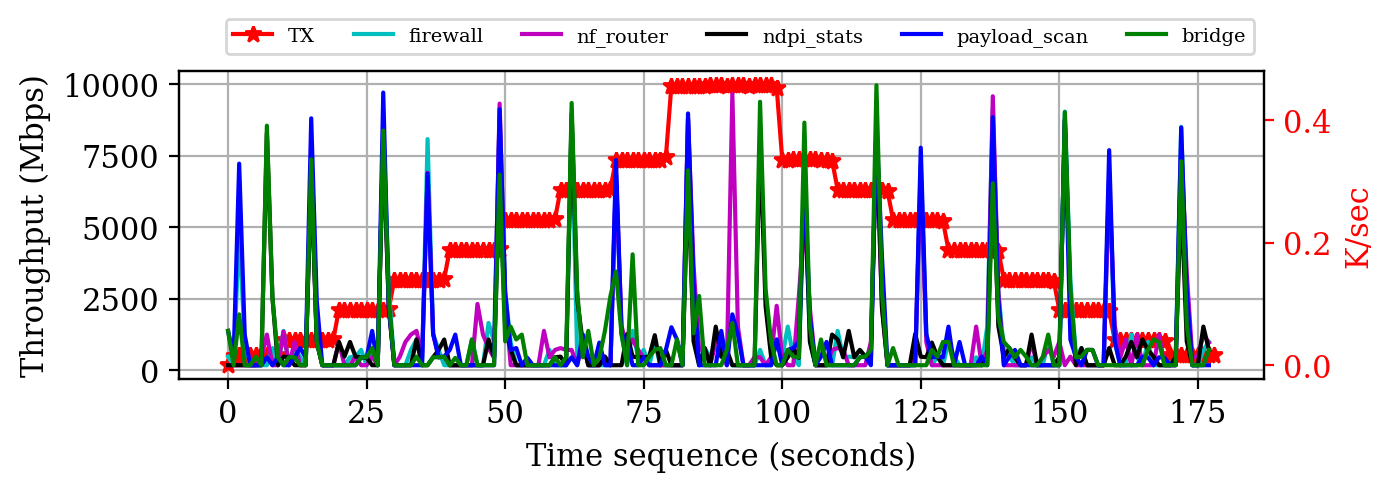

In [36]:
plot_feature("node-store-misses", "K/sec", 7)

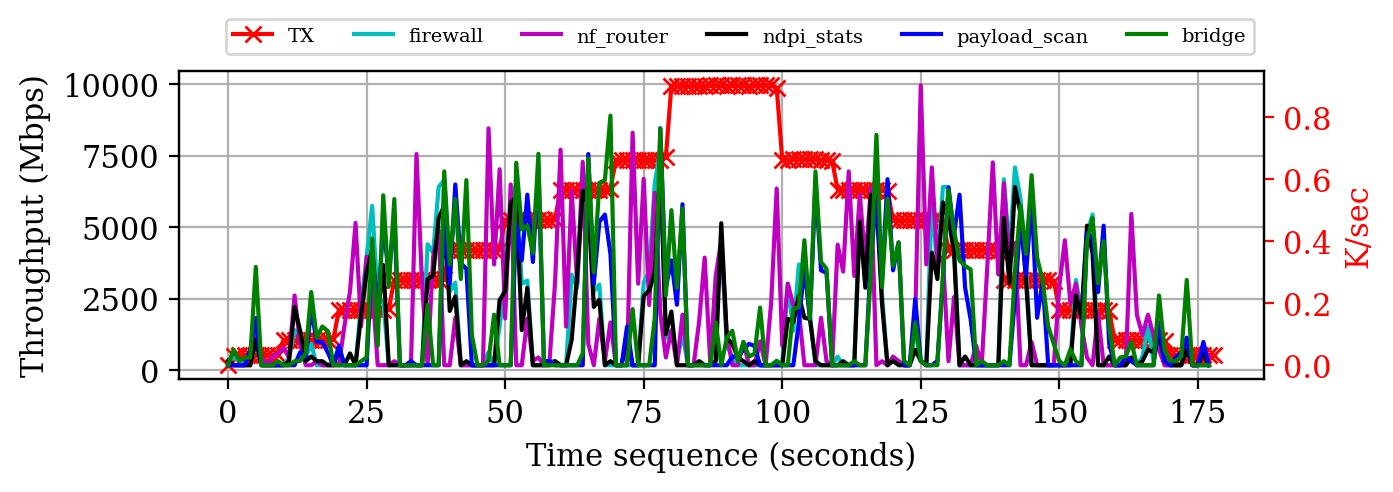

In [37]:
plot_feature("node-stores", "K/sec", 7)

In [4]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/load_stimulus_exp1.csv')
file_path = os.path.abspath('../linear/random_rates.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21981 entries, 0 to 21980
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          21981 non-null  float64
 1   output_rate                         21981 non-null  float64
 2   latency                             21981 non-null  float64
 3   firewall_instructions               21981 non-null  float64
 4   nf_router_instructions              21981 non-null  float64
 5   ndpi_stats_instructions             21981 non-null  float64
 6   payload_scan_instructions           21981 non-null  float64
 7   bridge_instructions                 21981 non-null  float64
 8   firewall_branches                   21981 non-null  float64
 9   nf_router_branches                  21981 non-null  float64
 10  ndpi_stats_branches                 21981 non-null  float64
 11  payload_scan_branches               21981

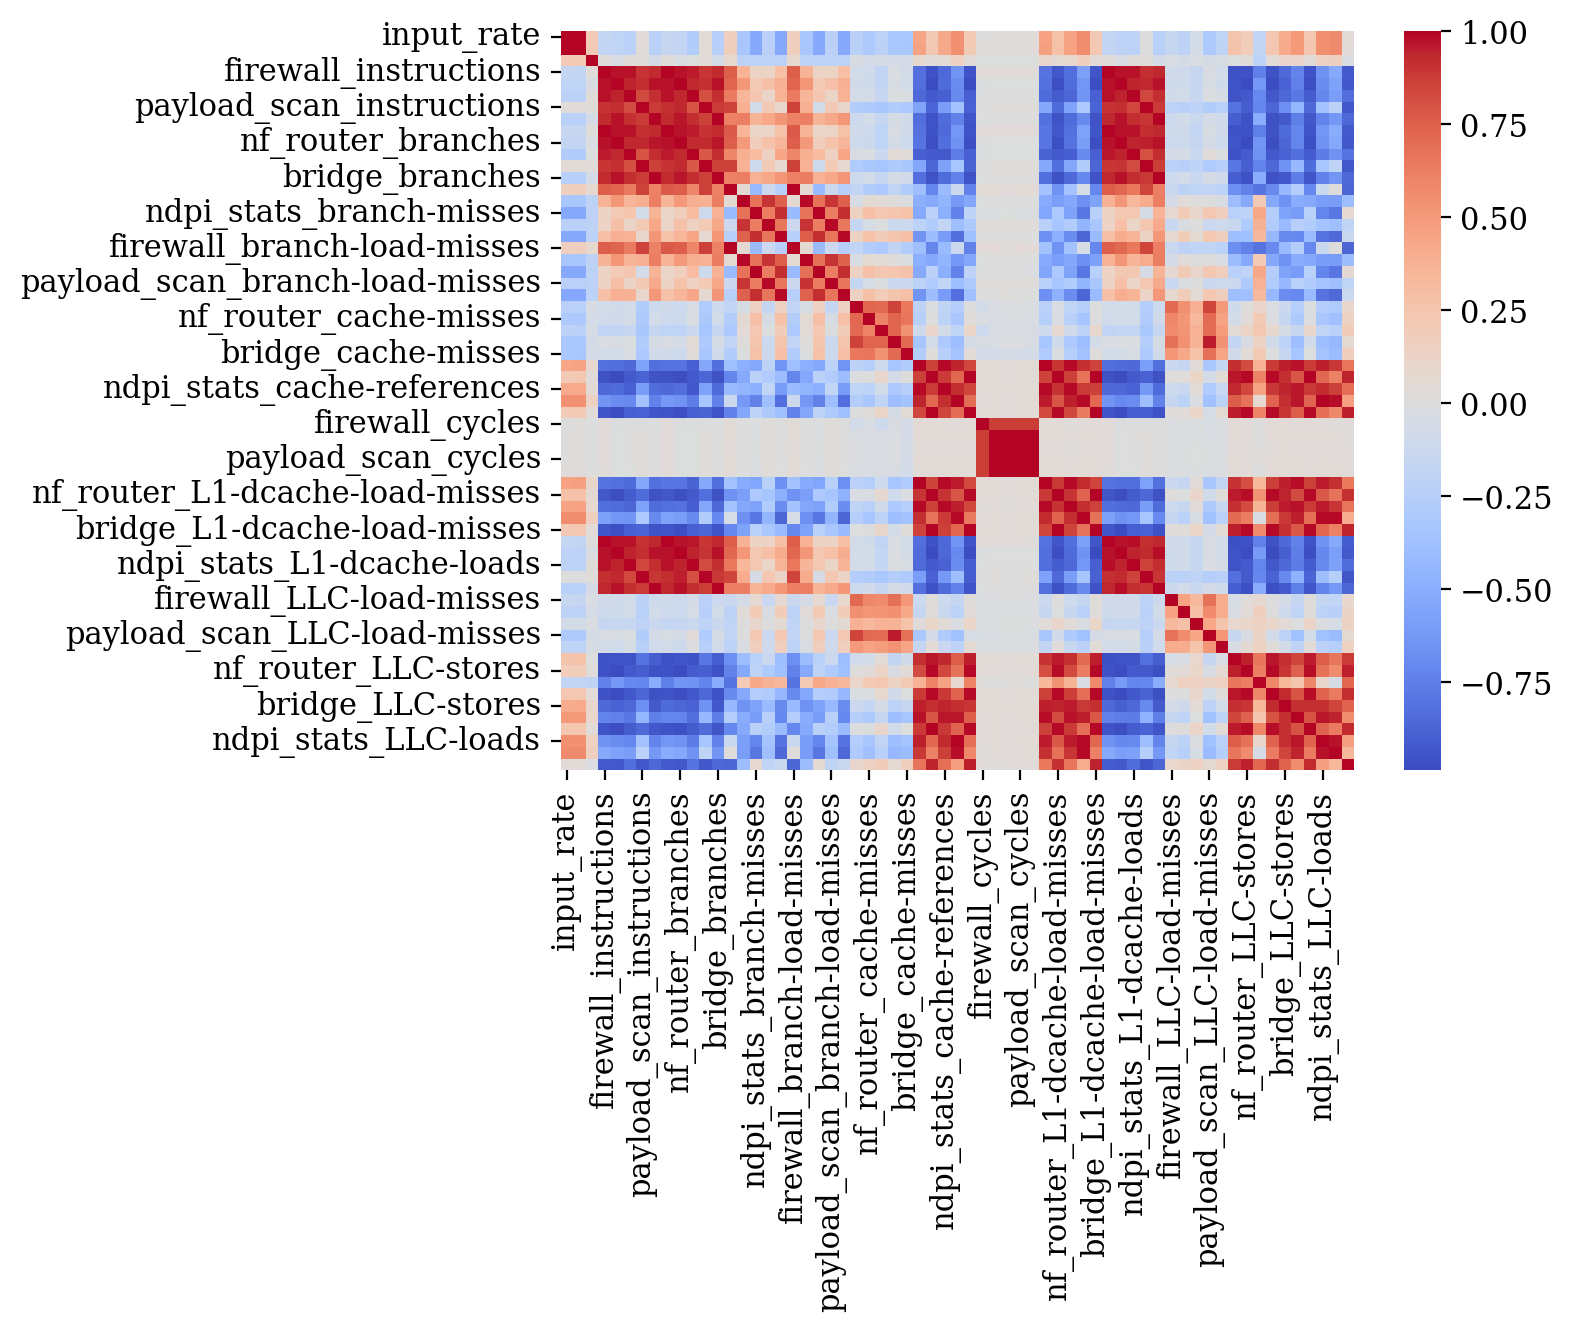

In [5]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.savefig('heatmap_ls_exp1.png')
plt.show()

In [13]:
from collections import defaultdict

def plot_cor(x, y):
    dict_values = defaultdict(int)
    dict_times = defaultdict(int)

    for i in range(len(x)):
        dict_values[x[i]] += y[i]
        dict_times[x[i]] += 1

    for key in dict_values.keys():
        dict_values[key] = dict_values[key] / dict_times[key]

    new_x = np.array(list(dict_values.keys()))
    new_y = []
    for i in range(len(new_x)):
        new_y.append(dict_values[new_x[i]])

    index = np.argsort(new_x)
    new_x = new_x[index]
    new_y = np.array(new_y)[index]
    return [new_x,new_y]

In [15]:
def generate_list_b(a):
    
    def find_clusters(a, threshold=100):
        clusters = []
        current_cluster = [a[0]]
        for i in range(1, len(a)):
            if abs(a[i] - a[i - 1]) <= threshold:
                current_cluster.append(a[i])
            else:
                clusters.append(current_cluster)
                current_cluster = [a[i]]
        clusters.append(current_cluster)
        return clusters
        print(clusters)
    def average(numbers):
        return sum(numbers) / len(numbers)

    clusters = find_clusters(a)
    b = []
    for cluster in clusters:
        avg = average(cluster)
        b.extend([avg] * len(cluster))
    return b


In [16]:
# linear regression

from sklearn.linear_model import LinearRegression

def linear_regression(a, b):
    # Convert the input lists to numpy arrays
    x = np.array(a)
    y = np.array(b)

    # Reshape the arrays to be 2D
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # Create and fit a linear regression model
    model = LinearRegression()
    model.fit(x, y)
    r2 = model.score(x, y)
    # Use the model to make predictions
    y_pred = model.predict(x)

    # Return the predicted values
    return y_pred,r2

In [38]:
# polynomial regression

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


def polynomial_regression(x, y, degree):
    
    # Reshape the arrays to be 2D
    
    x = np.array(x)
    y = np.array(y)

    # Transform the input data into a matrix of polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))

    # Create a linear regression model and fit it to the data
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    # model score
    r2 = r2_score(y, y_pred)
    # Return the coefficients of the polynomial equation
    return model.coef_, y_pred,r2

## Co-relationship between 'input rate' and 'instructions'

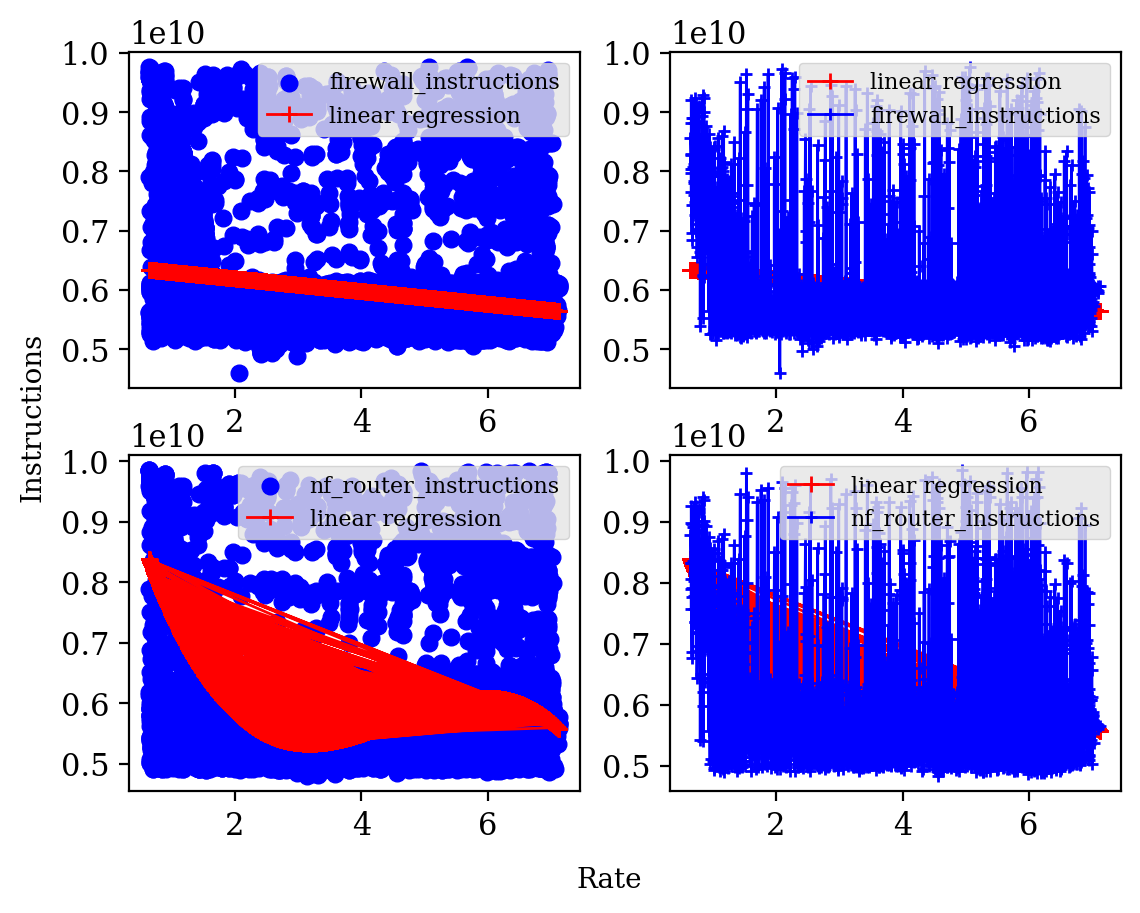

In [39]:
a = list(data['input_rate'])
b = list(data['ndpi_stats_instructions'])
c = list(data['nf_router_instructions'])
a2 = generate_list_b(a)

[a1, b1] = plot_cor(a2, b)
[a3, c1] = plot_cor(a2, c)

y_pred,r2 =linear_regression(a, b)
coef,y_pred_nf,r2_nf = polynomial_regression(a,c,3)

fig, ax = plt.subplots(2, 2)
plt.style.use('ggplot')

#fig.suptitle('Correlation between rate and VNF instructions', size='12')
l4 = ax[0][0].scatter(list(data['input_rate']/1000), b, c='b', label='firewall_instructions')
l4 = ax[0][0].plot(list(data['input_rate']/1000), y_pred, c='r', linewidth=1, marker = '+', label='linear regression')
ax[0][0].legend(loc="upper right", fontsize=8)

l4 = ax[0][1].plot(list(data['input_rate']/1000), y_pred, c='r', linewidth=1, marker = '+', label='linear regression')
l4 = ax[0][1].plot([x / 1000 for x in a1], b1, c='b', linewidth=1, label='firewall_instructions', marker='+', markersize=4)
ax[0][1].legend(loc="upper right", fontsize=8)



l4 = ax[1][0].scatter(list(data['input_rate']/1000), c, c='b', label='nf_router_instructions')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', label='linear regression')
ax[1][0].legend(loc="upper right", fontsize=8)

l4 = ax[1][1].plot(list(data['input_rate']/1000),y_pred_nf, c='r', linewidth=1, marker = '+', label='linear regression')
l4 = ax[1][1].plot([x / 1000 for x in a3], c1, c='b', linewidth=1, label='nf_router_instructions', marker='+', markersize=4)
ax[1][1].legend(loc="upper right", fontsize=8)


fig.text(0.5, 0.01, "Rate", size='10', ha='center')
fig.text(0.04, 0.5, 'Instructions', size='10', va='center', rotation='vertical')

# save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'rate_vnf_fr_nf.png')
plt.savefig(file_path)

plt.show()

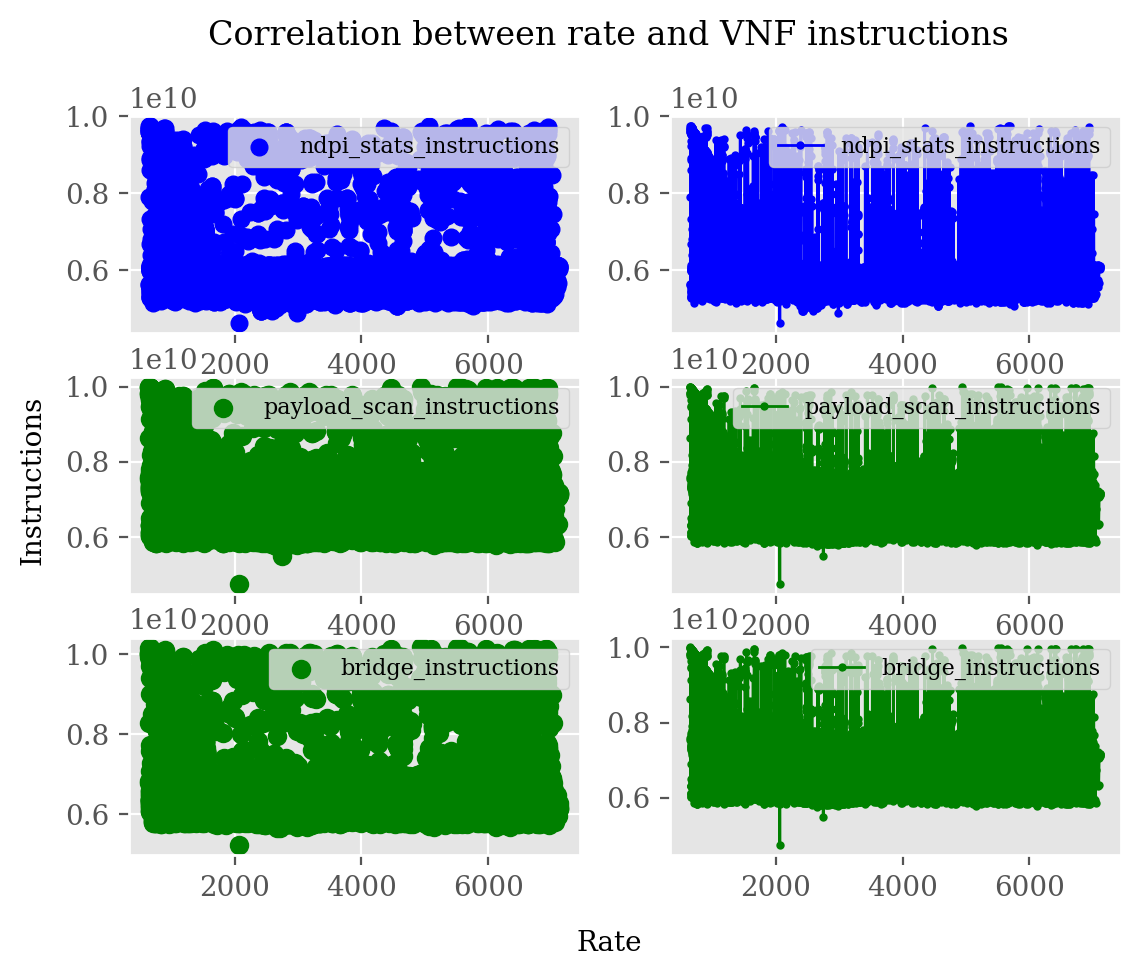

In [40]:
d = list(data['ndpi_stats_instructions'])
[a3, d1] = plot_cor(a, d)
e = list(data['payload_scan_instructions'])
[a4, e1] = plot_cor(a, e)
f = list(data['bridge_instructions'])
[a5, f1] =plot_cor(a, f)


fig, ax = plt.subplots(3, 2)
plt.style.use('ggplot')
fig.suptitle('Correlation between rate and VNF instructions', size='12')
l4 = ax[0][0].scatter(a, d, c='b', label='ndpi_stats_instructions')
ax[0][0].legend(loc="upper right", prop={'size':8})
l4 = ax[0][1].plot(a3, d1, c='b', linewidth=1, label='ndpi_stats_instructions', marker='o', markersize=2)
ax[0][1].legend(loc="upper right", prop={'size':8})


l4 = ax[1][0].scatter(a, e, c='g', linewidth=1, label='payload_scan_instructions')
ax[1][0].legend(loc="upper right", prop={'size':8})
l4 = ax[1][1].plot(a4, e1, c='g', linewidth=1, label='payload_scan_instructions', marker='o', markersize=2)
ax[1][1].legend(loc="upper right", prop={'size':8})


l4 = ax[2][0].scatter(a, f, c='g', linewidth=1, label='bridge_instructions')
ax[2][0].legend(loc="upper right", prop={'size':8})
l4 = ax[2][1].plot(a4, e1, c='g', linewidth=1, label='bridge_instructions', marker='o', markersize=2)
ax[2][1].legend(loc="upper right", prop={'size':8})

fig.text(0.5, 0.01, "Rate", size='10', ha='center')
fig.text(0.04, 0.5, 'Instructions', size='10', va='center', rotation='vertical')
plt.grid()
plt.show()

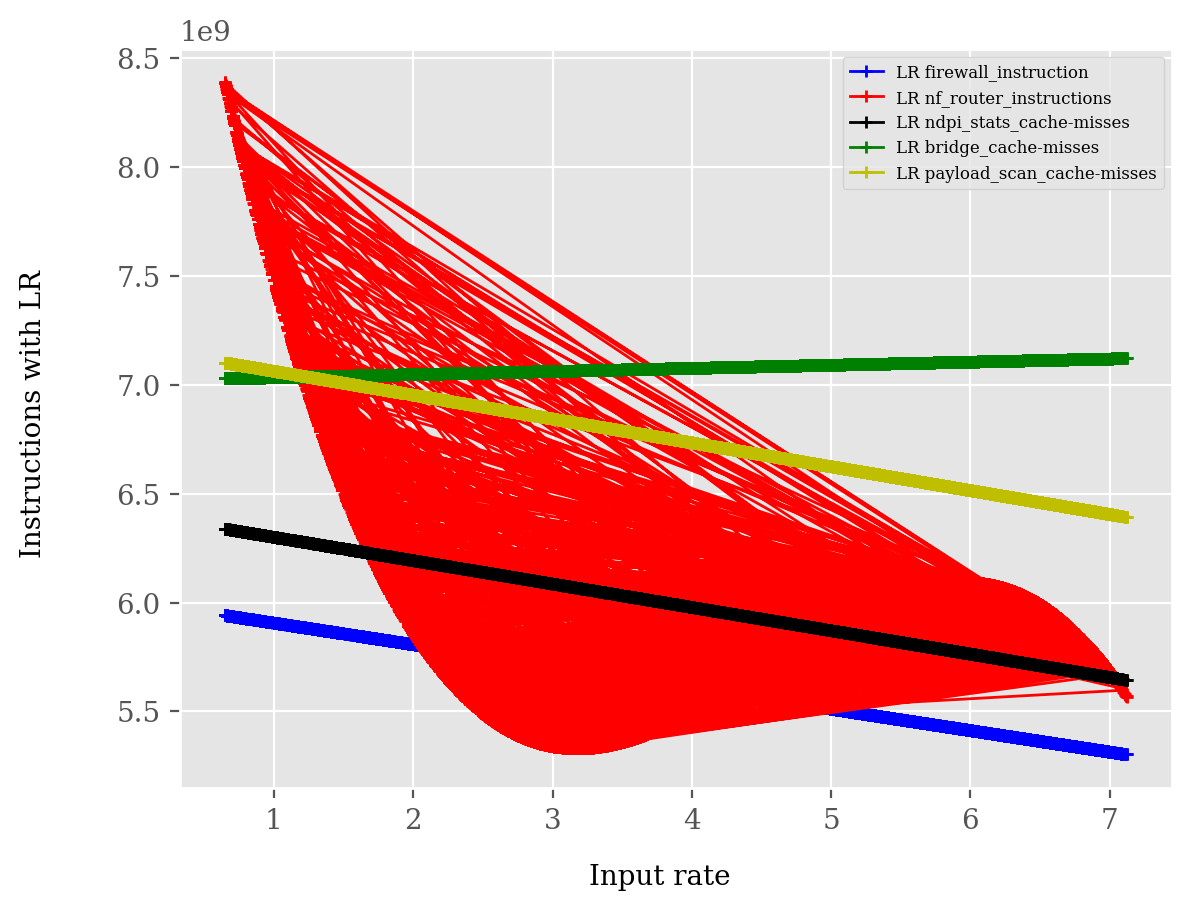

0.026454016966850902,0.30954824156441396,0.048676041147659777,0.0010577965709099857,0.05749577228340652


In [41]:
# compare different VNF instruction and rate

a = list(data['input_rate'])
b = list(data['firewall_instructions'])
c = list(data['nf_router_instructions'])
d = list(data['ndpi_stats_instructions'])
e = list(data['payload_scan_instructions'])
f = list(data['bridge_instructions'])


[a1, b1] = plot_cor(generate_list_b(list(data['input_rate'])), list(data['firewall_instructions']))
[a2, b2] = plot_cor(generate_list_b(list(data['input_rate'])), list(data['nf_router_instructions']))
[a3, b3] = plot_cor(generate_list_b(list(data['input_rate'])), list(data['ndpi_stats_instructions']))
[a4, b4] = plot_cor(generate_list_b(list(data['input_rate'])), list(data['payload_scan_instructions']))
[a5, b5] = plot_cor(generate_list_b(list(data['input_rate'])), list(data['bridge_instructions']))
fig, ax = plt.subplots()
plt.style.use('ggplot')


#fig.suptitle('Correlation between traffic and instructions', size='12')
y_pred_f,r2_f = linear_regression(list(data['input_rate']), data['firewall_instructions'])
coef,y_pred_nf,r2_nf = polynomial_regression(list(data['input_rate']), data['nf_router_instructions'],3)
#linear_regression(list(data['input_rate']), data['nf_router_instructions'])
y_pred_ndpi,r2_ndpi = linear_regression(list(data['input_rate']), data['ndpi_stats_instructions'])
y_pred_pl,r2_pl = linear_regression(list(data['input_rate']), data['payload_scan_instructions'])
y_pred_bg,r2_bg = linear_regression(list(data['input_rate']), data['bridge_instructions'])

# firewall
l4 = ax.plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='LR firewall_instruction')
#l4 = ax[1].plot([x / 1000 for x in a1], b1, c='b', linewidth=1, label='firewall_instructions', marker='+', markersize=4)

#nf router
l4 = ax.plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='LR nf_router_instructions')
#l4 = ax[1].plot([x / 1000 for x in a2], b2, c='r', linewidth=1, label='nf_router_instructions', marker='+', markersize=4)


l4 = ax.plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='LR ndpi_stats_cache-misses')
#l4 = ax[1].plot([x / 1000 for x in a3], b3, c='k', linewidth=1, label='ndpi_stats_cache-misses', marker='+', markersize=4)


l4 = ax.plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='LR bridge_cache-misses')
#l4 = ax[1].plot([x / 1000 for x in a4], b4, c='g', linewidth=1, label='bridge_cache-misses', marker='+', markersize=4)


l4 = ax.plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='LR payload_scan_cache-misses')
#l4 = ax[1].plot([x / 1000 for x in a5], b5, c='y', linewidth=1, label='payload_scan_cache-misses', marker='+', markersize=4)
#ax[1].legend(loc="upper right", fontsize=6)
ax.legend(loc="upper right", fontsize=6)
fig.text(0.5, 0.01, "Input rate", size='10', ha='center')
fig.text(0, 0.5, 'Instructions with LR', size='10', va='center', rotation='vertical')

#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'intructionswithLR3.png')
plt.savefig(file_path)
plt.show()

print(f"{r2_f},{r2_nf},{r2_ndpi},{r2_pl},{r2_bg}")

#  Co-relationship between 'instructions' and 'branches'



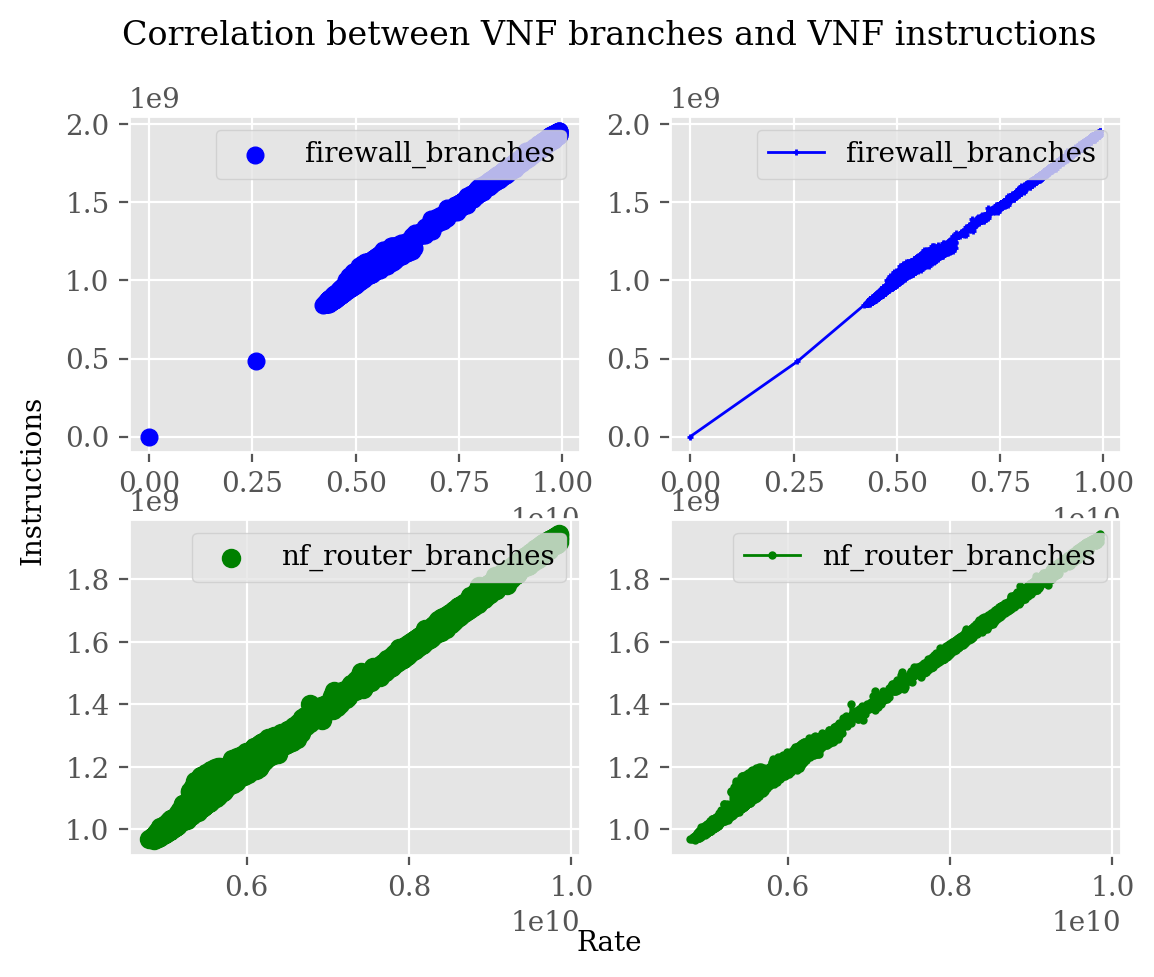

In [43]:
from sklearn.linear_model import LinearRegression
import numpy as np
a = list(data['input_rate'])
a=list(data['firewall_instructions'])
b = list(data['firewall_branches'])
[a1, b1] = plot_cor(a, b)
d = list(data['nf_router_instructions'])
c = list(data['nf_router_branches'])
[a2, c1] = plot_cor(d, c)




fig, ax = plt.subplots(2, 2)
plt.style.use('ggplot')
fig.suptitle('Correlation between VNF branches and VNF instructions', size='12')
l4 = ax[0][0].scatter(a, b, c='b', label='firewall_branches')
ax[0][0].legend(loc="upper right")
l4 = ax[0][1].plot(a1, b1, c='b', linewidth=1, label='firewall_branches', marker='+', markersize=2)
ax[0][1].legend(loc="upper right")
l4 = ax[1][0].scatter(d, c, c='g', linewidth=1, label='nf_router_branches')
ax[1][0].legend(loc="upper right")
l4 = ax[1][1].plot(a2, c1, c='g', linewidth=1, label='nf_router_branches', marker='o', markersize=2)
ax[1][1].legend(loc="upper right")

fig.text(0.5, 0.01, "Rate", size='10', ha='center')
fig.text(0.04, 0.5, 'Instructions', size='10', va='center', rotation='vertical')

plt.show()


# Co-relationship between 'rate' and 'branches-misses'

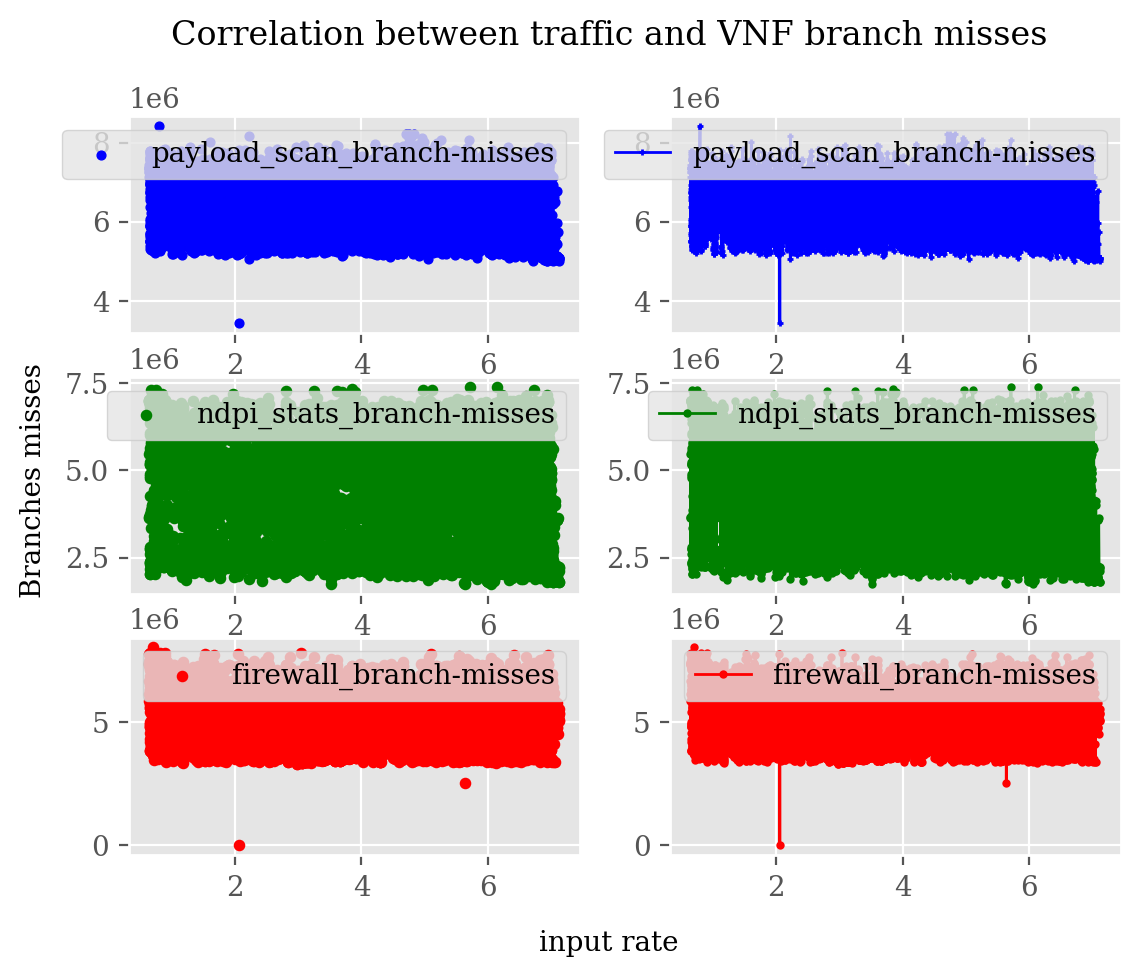

In [44]:
a = list(data['input_rate']/1000)

b = list(data['payload_scan_branch-misses'])
[a1, b1] = plot_cor(a, b)

c = list(data['ndpi_stats_branch-misses'])
[a2, c1] = plot_cor(a, c)

d=list(data['firewall_branch-misses'])
[a3, d1] = plot_cor(a, d)



fig, ax = plt.subplots(3, 2)
plt.style.use('ggplot')
fig.suptitle('Correlation between traffic and VNF branch misses', size='12')
l4 = ax[0][0].scatter(a, b, c='b', label='payload_scan_branch-misses', s=10)
ax[0][0].legend(loc="upper right")
l4 = ax[0][1].plot(a1, b1, c='b', linewidth=1, label='payload_scan_branch-misses', marker='+', markersize=2)
ax[0][1].legend(loc="upper right")
l4 = ax[1][0].scatter(a, c, c='g', linewidth=1, label='ndpi_stats_branch-misses', s=10)
ax[1][0].legend(loc="upper right")
l4 = ax[1][1].plot(a2, c1, c='g', linewidth=1, label='ndpi_stats_branch-misses', marker='o', markersize=2)
ax[1][1].legend(loc="upper right")

l4 = ax[2][0].scatter(a, d, c='r', linewidth=1, label='firewall_branch-misses', s=10)
ax[2][0].legend(loc="upper right")
l4 = ax[2][1].plot(a3, d1, c='r', linewidth=1, label='firewall_branch-misses', marker='o', markersize=2)
ax[2][1].legend(loc="upper right")

fig.text(0.5, 0.01, "input rate", size='10', ha='center')
fig.text(0.04, 0.5, 'Branches misses', size='10', va='center', rotation='vertical')

plt.show()


# Data and instruction caches


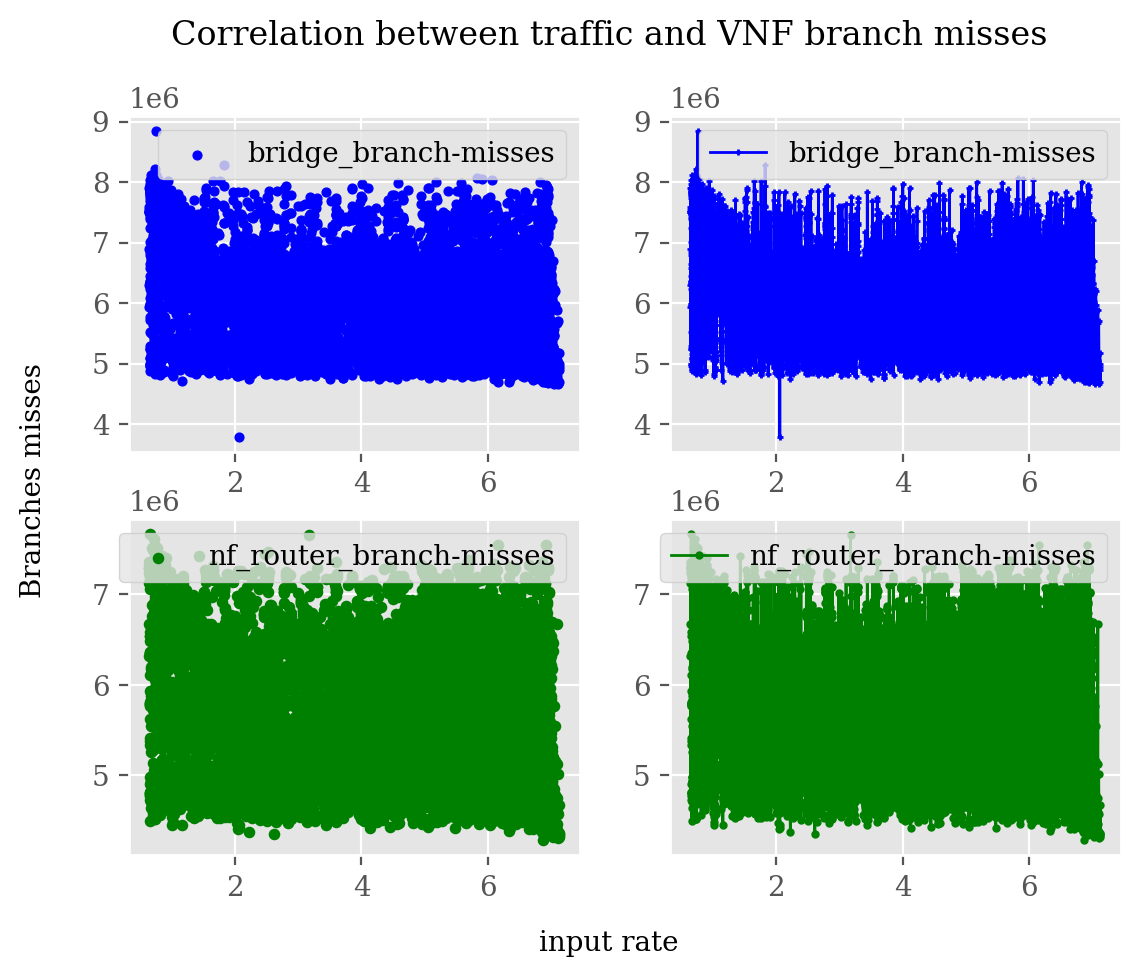

In [45]:
a = list(data['input_rate']/1000)

b = list(data['bridge_branch-misses'])
[a1, b1] = plot_cor(a, b)

c = list(data['nf_router_branch-misses'])
[a2, c1] = plot_cor(a, c)

fig, ax = plt.subplots(2, 2)
plt.style.use('ggplot')
fig.suptitle('Correlation between traffic and VNF branch misses', size='12')
l4 = ax[0][0].scatter(a, b, c='b', label='bridge_branch-misses', s=10)
ax[0][0].legend(loc="upper right")
l4 = ax[0][1].plot(a1, b1, c='b', linewidth=1, label='bridge_branch-misses', marker='+', markersize=2)
ax[0][1].legend(loc="upper right")
l4 = ax[1][0].scatter(a, c, c='g', linewidth=1, label='nf_router_branch-misses', s=10)
ax[1][0].legend(loc="upper right")
l4 = ax[1][1].plot(a2, c1, c='g', linewidth=1, label='nf_router_branch-misses', marker='o', markersize=2)
ax[1][1].legend(loc="upper right")


fig.text(0.5, 0.01, "input rate", size='10', ha='center')
fig.text(0.04, 0.5, 'Branches misses', size='10', va='center', rotation='vertical')

plt.show()


Text(0, 0.5, 'Cache misses')

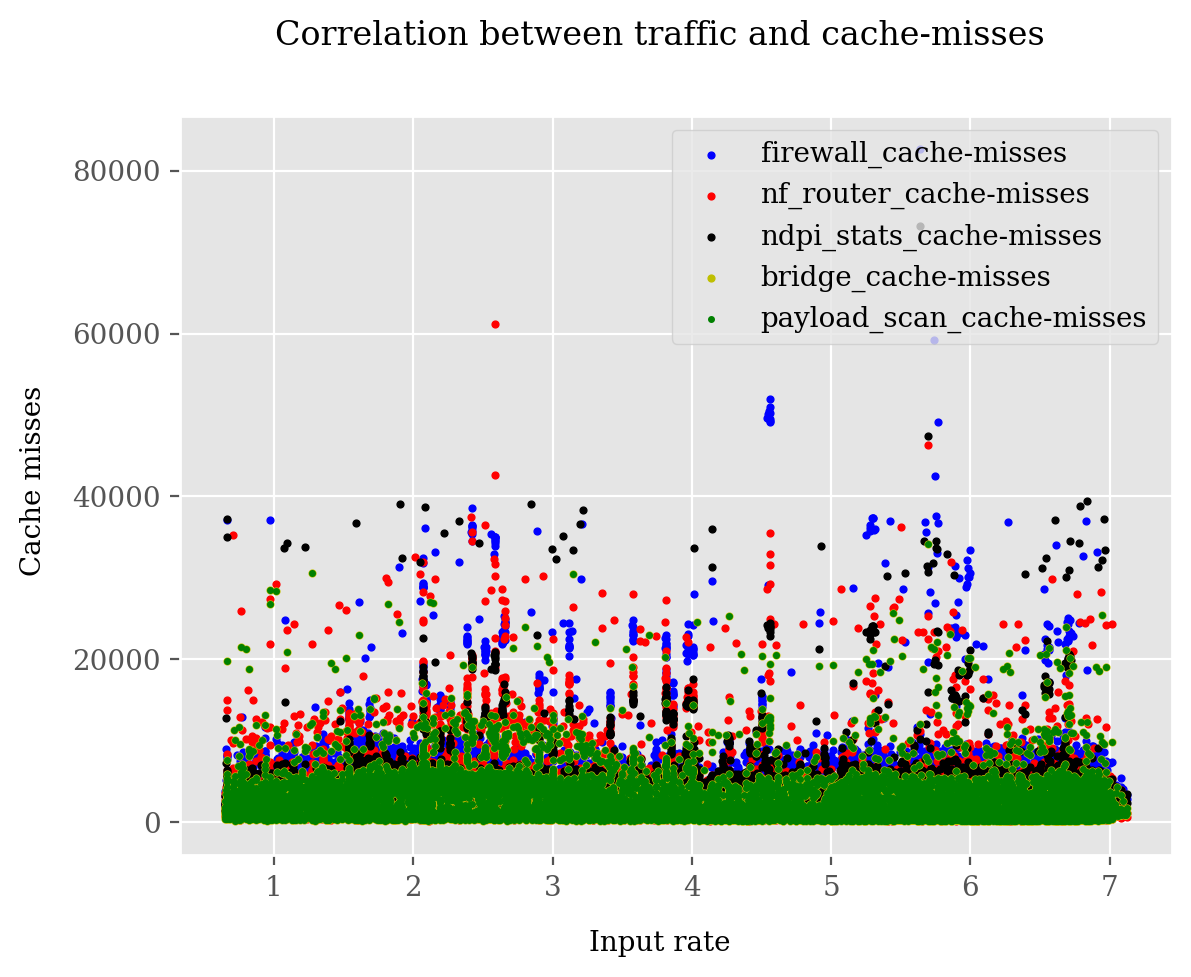

In [18]:
a = list(data['input_rate']/1000)

# cache-misses
b = list(data['firewall_cache-misses'])
[a1, b1] = plot_cor(a, b)
e = list(data['nf_router_cache-misses'])
[a4, e1] = plot_cor(a, e)
f = list(data['ndpi_stats_cache-misses'])
[a5, f1] = plot_cor(a, f)
g = list(data['bridge_cache-misses'])
[a6, g1] = plot_cor(a, g)
h = list(data['payload_scan_cache-misses'])
[a7, h1] = plot_cor(a, h)
fig, ax = plt.subplots()
plt.style.use('ggplot')
fig.suptitle('Correlation between traffic and cache-misses', size='12')
l4 = ax.scatter(a, b, c='b', label='firewall_cache-misses', s=6)
l4 = ax.scatter(a, e, c='r', label='nf_router_cache-misses', s=6)
l4 = ax.scatter(a, f, c='k', label='ndpi_stats_cache-misses', s=6)
l4 = ax.scatter(a, g, c='y', label='bridge_cache-misses', s=6)
l4 = ax.scatter(a, g, c='g', label='payload_scan_cache-misses', s=4)
ax.legend(loc="upper right")
fig.text(0.5, 0.01, "Input rate", size='10', ha='center')
fig.text(0, 0.5, 'Cache misses', size='10', va='center', rotation='vertical')


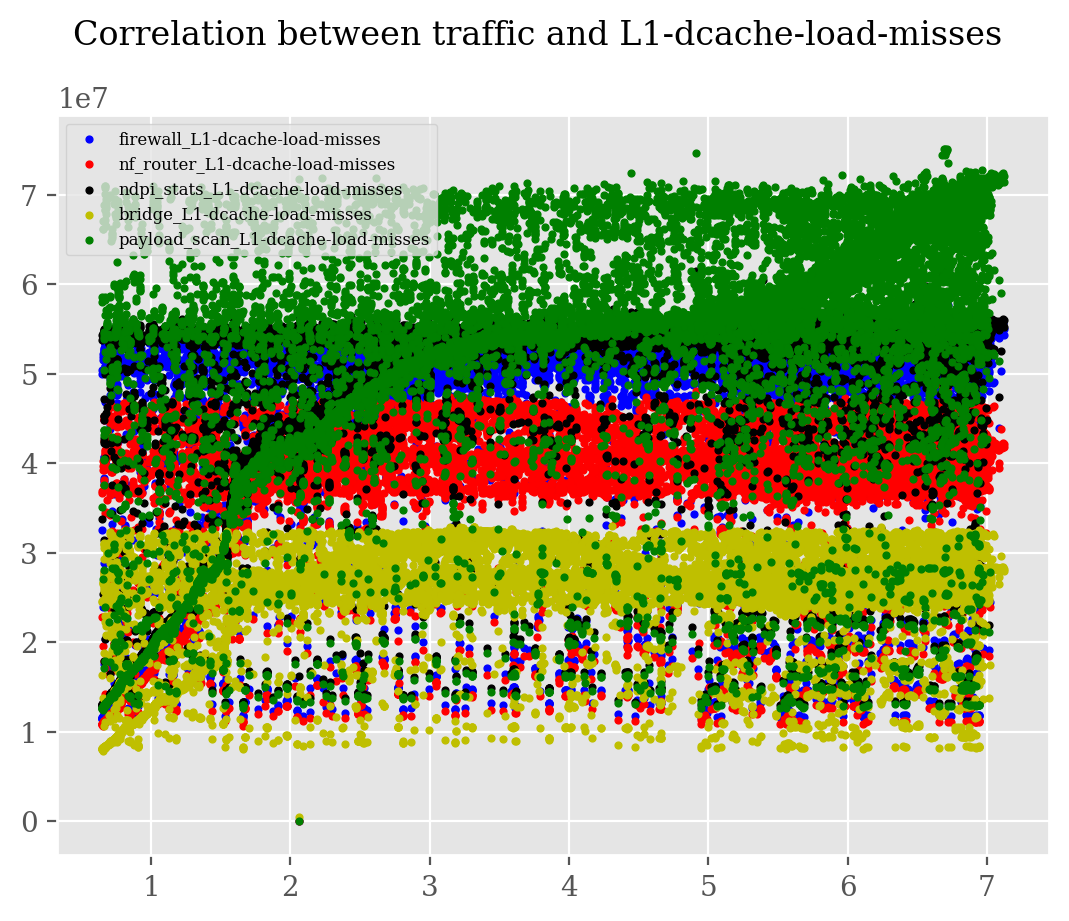

In [19]:
a = list(data['input_rate']/1000)

# cache-misses
b = list(data['firewall_L1-dcache-load-misses'])
[a1, b1] = plot_cor(a, b)
e = list(data['nf_router_L1-dcache-load-misses'])
[a4, e1] = plot_cor(a, e)
f = list(data['ndpi_stats_L1-dcache-load-misses'])
[a5, f1] = plot_cor(a, f)
g = list(data['bridge_L1-dcache-load-misses'])
[a6, g1] = plot_cor(a, g)
h = list(data['payload_scan_L1-dcache-load-misses'])
[a7, h1] = plot_cor(a, h)

fig, ax = plt.subplots()
plt.style.use('ggplot')
fig.suptitle('Correlation between traffic and L1-dcache-load-misses', size='12')
l4 = ax.scatter(a, b, c='b', label='firewall_L1-dcache-load-misses', s=6)
l4 = ax.scatter(a, e, c='r', label='nf_router_L1-dcache-load-misses', s=6)
l4 = ax.scatter(a, f, c='k', label='ndpi_stats_L1-dcache-load-misses', s=6)
l4 = ax.scatter(a, g, c='y', label='bridge_L1-dcache-load-misses', s=6)
l4 = ax.scatter(a, h, c='g', label='payload_scan_L1-dcache-load-misses', s=6)
ax.legend(loc="upper left",fontsize=6)

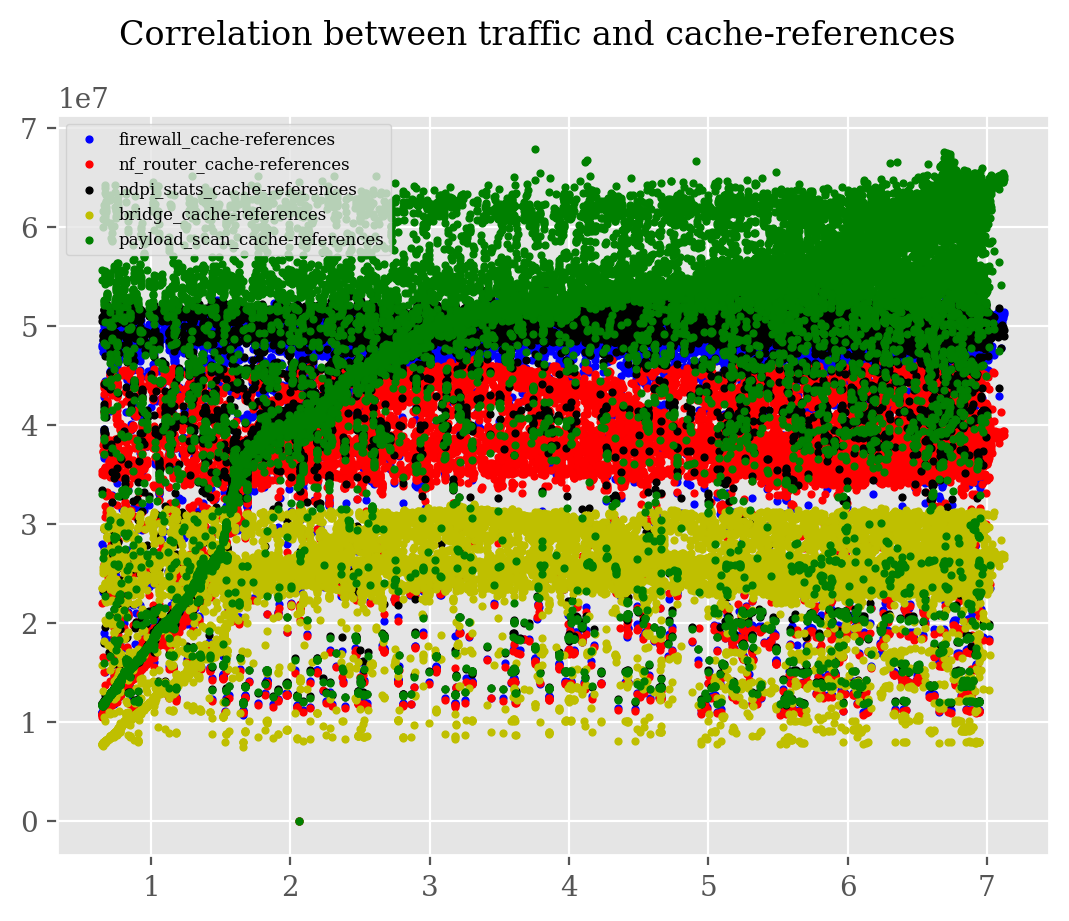

In [47]:
a = list(data['input_rate']/1000)

# cache-misses
b = list(data['firewall_cache-references'])
[a1, b1] = plot_cor(a, b)
e = list(data['nf_router_cache-references'])
[a4, e1] = plot_cor(a, e)
f = list(data['ndpi_stats_cache-references'])
[a5, f1] = plot_cor(a, f)

g = list(data['bridge_cache-references'])
[a6, g1] = plot_cor(a, g)
h = list(data['payload_scan_cache-references'])
[a7, h1] = plot_cor(a, h)


fig, ax = plt.subplots()
plt.style.use('ggplot')
fig.suptitle('Correlation between traffic and cache-references', size='12')
l4 = ax.scatter(a, b, c='b', label='firewall_cache-references', s=6)
l4 = ax.scatter(a, e, c='r', label='nf_router_cache-references', s=6)
l4 = ax.scatter(a, f, c='k', label='ndpi_stats_cache-references', s=6)
l4 = ax.scatter(a, g, c='y', label='bridge_cache-references', s=6)
l4 = ax.scatter(a, h, c='g', label='payload_scan_cache-references', s=6)
ax.legend(loc="upper left",fontsize=6)




# Address translation: virtual memory

0.25,0.06,0.29,0.00,0.33
0.07,0.04,0.03,0.17,0.06


NameError: name 'polynomial_regression' is not defined

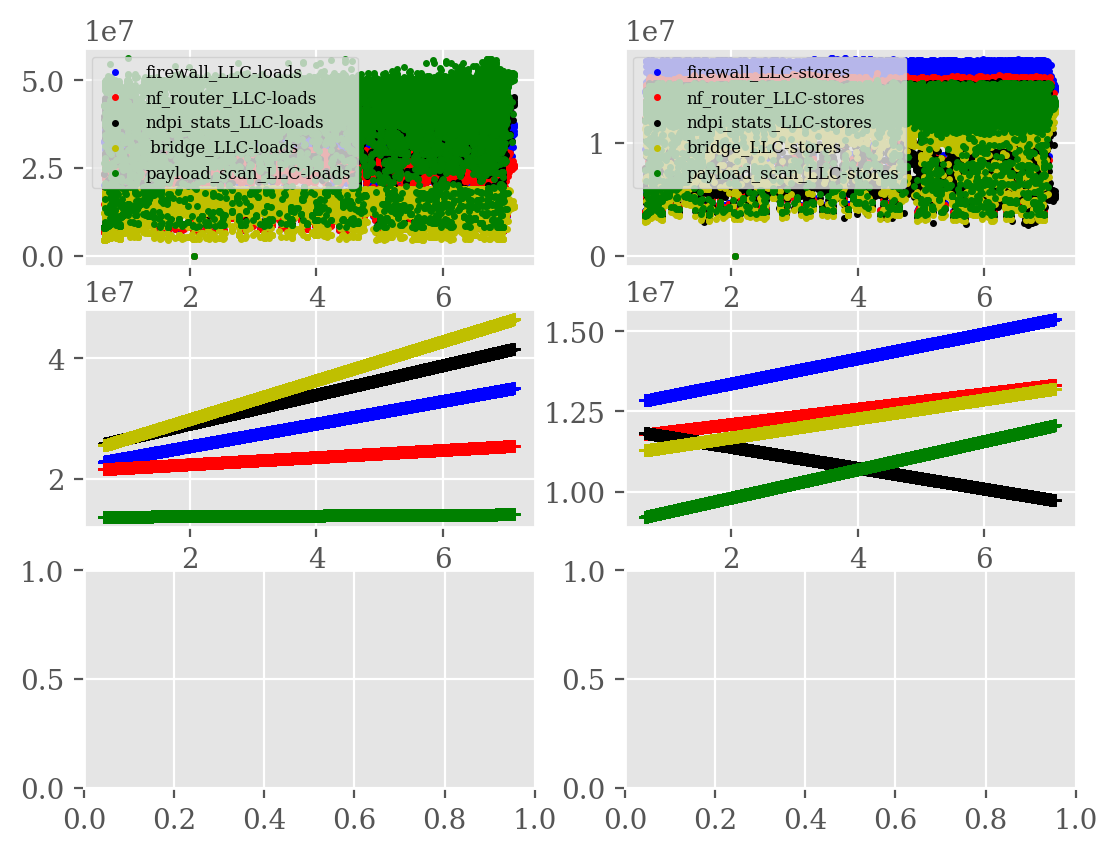

In [20]:
a = list(data['input_rate']/1000)

# LLC-loads
b = list(data['firewall_LLC-loads'])
[a1, b1] = plot_cor(a, b)
e = list(data['nf_router_LLC-loads'])
[a4, e1] = plot_cor(a, e)
f = list(data['ndpi_stats_LLC-loads'])
[a5, f1] = plot_cor(a, f)
g = list(data['bridge_LLC-loads'])
[a6, g1] = plot_cor(a, g)
h = list(data['payload_scan_LLC-loads'])
[a7, h1] = plot_cor(a, h)


# LLC-stores 
i = list(data['firewall_LLC-stores'])
j = list(data['nf_router_LLC-stores'])
k = list(data['ndpi_stats_LLC-stores'])
l = list(data['bridge_LLC-stores'])
m = list(data['payload_scan_LLC-stores'])


y_pred_f,r2_f = linear_regression(list(data['input_rate']),b)
y_pred_nf,r2_nf = linear_regression(list(data['input_rate']), e)
y_pred_ndpi,r2_ndpi = linear_regression(list(data['input_rate']), f)
y_pred_pl,r2_pl = linear_regression(list(data['input_rate']), g)
y_pred_bg,r2_bg = linear_regression(list(data['input_rate']), h)

#fig = plt.figure(figsize=(4, 8)) # adjust the height as needed
fig, ax = plt.subplots(3,2)
plt.style.use('ggplot')

#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[0][0].scatter(a, b, c='b', label='firewall_LLC-loads', s=4)
l4 = ax[0][0].scatter(a, e, c='r', label='nf_router_LLC-loads', s=4)
l4 = ax[0][0].scatter(a, f, c='k', label='ndpi_stats_LLC-loads', s=4)
l4 = ax[0][0].scatter(a, g, c='y', label=' bridge_LLC-loads', s=4)
l4 = ax[0][0].scatter(a, h, c='g', label='payload_scan_LLC-loads', s=4)
ax[0][0].legend(loc="upper left",fontsize =6)


l4 = ax[0][1].scatter(a, i, c='b', label='firewall_LLC-stores', s=4)
l4 = ax[0][1].scatter(a, j, c='r', label='nf_router_LLC-stores', s=4)
l4 = ax[0][1].scatter(a, k, c='k', label='ndpi_stats_LLC-stores', s=4)
l4 = ax[0][1].scatter(a, l, c='y', label='bridge_LLC-stores', s=4)
l4 = ax[0][1].scatter(a, m, c='g', label='payload_scan_LLC-stores', s=4)
ax[0][1].legend(loc="upper left",fontsize =6)




#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall_LLC-loads')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf_router_LLC-loads')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi_stats_LLC-loads')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='bridge_LLC-loads')
l4 = ax[1][0].plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='payload_scan_LLC-loads')
#ax[1][0].legend(loc="upper right", fontsize=4)


print(f"{r2_f:.2f},{r2_nf:.2f},{r2_ndpi:.2f},{r2_pl:.2f},{r2_bg:.2f}")


y_pred_f,r2_f = linear_regression(list(data['input_rate']),i)
y_pred_nf,r2_nf = linear_regression(list(data['input_rate']), j)
y_pred_ndpi,r2_ndpi = linear_regression(list(data['input_rate']), k)
y_pred_pl,r2_pl = linear_regression(list(data['input_rate']), l)
y_pred_bg,r2_bg = linear_regression(list(data['input_rate']), m)


#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall_LLC-loads')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf_router_LLC-loads')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi_stats_LLC-loads')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='bridge_LLC-loads')
l4 = ax[1][1].plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='payload_scan_LLC-loads')
#ax[1][1].legend(loc="upper right", fontsize=4)

print(f"{r2_f:.2f},{r2_nf:.2f},{r2_ndpi:.2f},{r2_pl:.2f},{r2_bg:.2f}")


# polynomial regression
coeffs, y_pred, r2 = polynomial_regression(list(data['input_rate']), b, degree=2)
coeffs_nf, y_pred_nf, r2_nf = polynomial_regression(list(data['input_rate']), e, degree=2)
coeffs_ndpi, y_pred_ndpi, r2_ndpi = polynomial_regression(list(data['input_rate']), list(data['ndpi_stats_LLC-loads']), degree=2)
coeffs_pl, y_pred_pl, r2_pl =polynomial_regression(list(data['input_rate']), list(data['bridge_LLC-loads']), degree=2)
coeffs_bg, y_pred_bg, r2_bg = polynomial_regression(list(data['input_rate']), list(data['payload_scan_LLC-loads']), degree=2)

#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall_LLC-loads')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf_router_LLC-loads')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi_stats_LLC-loads')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='bridge_LLC-loads')
l4 = ax[2][0].plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='payload_scan_LLC-loads')
#ax[1][1].legend(loc="upper right", fontsize=6)


print(f"{r2_f:.2f},{r2_nf:.2f},{r2_ndpi:.2f},{r2_pl:.2f},{r2_bg:.2f}")


# polynomial regression
coeffs, y_pred, r2 = polynomial_regression(list(data['input_rate']), i, degree=2)
coeffs_nf, y_pred_nf, r2_nf = polynomial_regression(list(data['input_rate']), j, degree=2)
coeffs_ndpi, y_pred_ndpi, r2_ndpi = polynomial_regression(list(data['input_rate']), k, degree=2)
coeffs_pl, y_pred_pl, r2_pl =polynomial_regression(list(data['input_rate']), l, degree=2)
coeffs_bg, y_pred_bg, r2_bg = polynomial_regression(list(data['input_rate']), m, degree=2)

#fig.suptitle('Correlation between traffic and VNF LLC-loads', size='10')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_f, c='b', linewidth=1, marker = '+', markersize=4, label='firewall_LLC-loads')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_nf, c='r', linewidth=1, marker = '+', markersize=4,label='nf_router_LLC-loads')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_ndpi, c='k', linewidth=1, marker = '+',markersize=4, label='ndpi_stats_LLC-loads')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_pl, c='g', linewidth=1, marker = '+', markersize=4, label='bridge_LLC-loads')
l4 = ax[2][1].plot(list(data['input_rate']/1000), y_pred_bg, c='y', linewidth=1, marker = '+', markersize=4, label='payload_scan_LLC-loads')
#ax[2][1].legend(loc="upper right", fontsize=6)


print(f"{r2_f:.2f},{r2_nf:.2f},{r2_ndpi:.2f},{r2_pl:.2f},{r2_bg:.2f}")


fig.text(0.5, 0.01, "Input rate", size='10', ha='center')
fig.text(0.04, 0.5, 'LLC load and stores', size='10', va='center', rotation='vertical')

#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'traffic_llc1.png')
plt.savefig(file_path)
plt.show()

# input rate and cycles

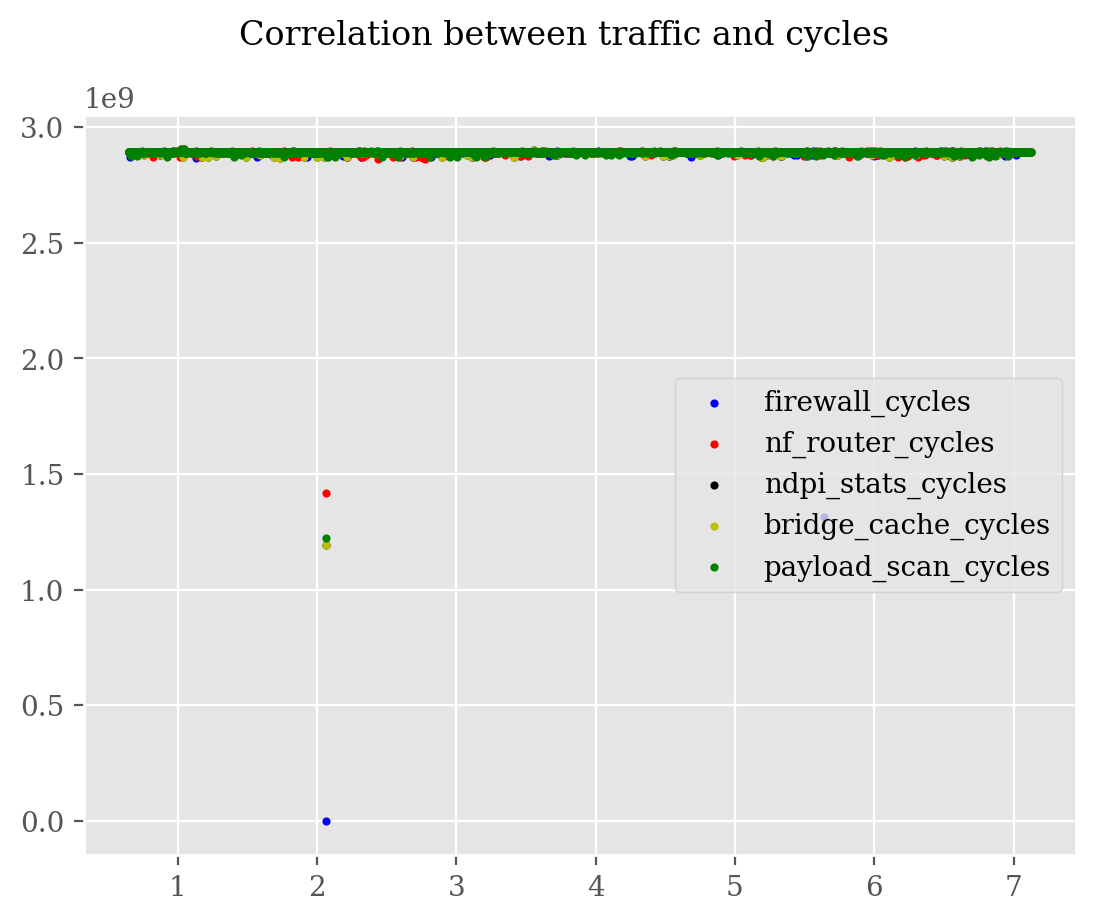

In [21]:
a = list(data['input_rate']/1000)

# cache-misses
b = list(data['firewall_cycles'])
[a1, b1] = plot_cor(a, b)
e = list(data['nf_router_cycles'])
[a4, e1] = plot_cor(a, e)
f = list(data['ndpi_stats_cycles'])
[a5, f1] = plot_cor(a, f)
g = list(data['ndpi_stats_cycles'])
[a6, g1] = plot_cor(a, g)
h = list(data['payload_scan_cycles'])
[a7, h1] = plot_cor(a, h)


fig, ax = plt.subplots()
plt.style.use('ggplot')
fig.suptitle('Correlation between traffic and cycles', size='12')
l4 = ax.scatter(a, b, c='b', label='firewall_cycles', s=6)
l4 = ax.scatter(a, e, c='r', label='nf_router_cycles', s=6)
l4 = ax.scatter(a, f, c='k', label='ndpi_stats_cycles', s=6)
l4 = ax.scatter(a, g, c='y', label='bridge_cache_cycles', s=6)
l4 = ax.scatter(a, h, c='g', label='payload_scan_cycles', s=6)
ax.legend(loc="center right")




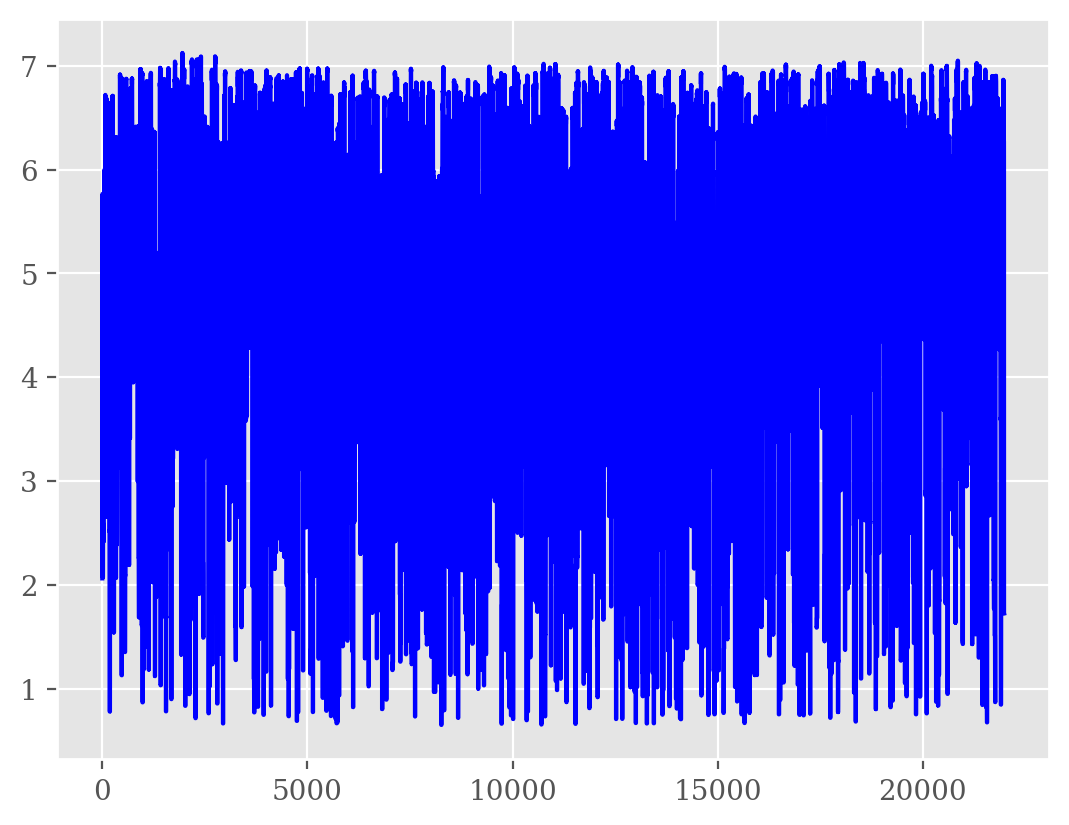

4.557533720258471
0.64956534194572
7.123542516256499


In [22]:
plt.plot(a, c='b', label='rate')
plt.show()
print(sum(a)/len(a))
print(min(a))
print(max(a))

# principal component analysis

1362822
(21981, 2)


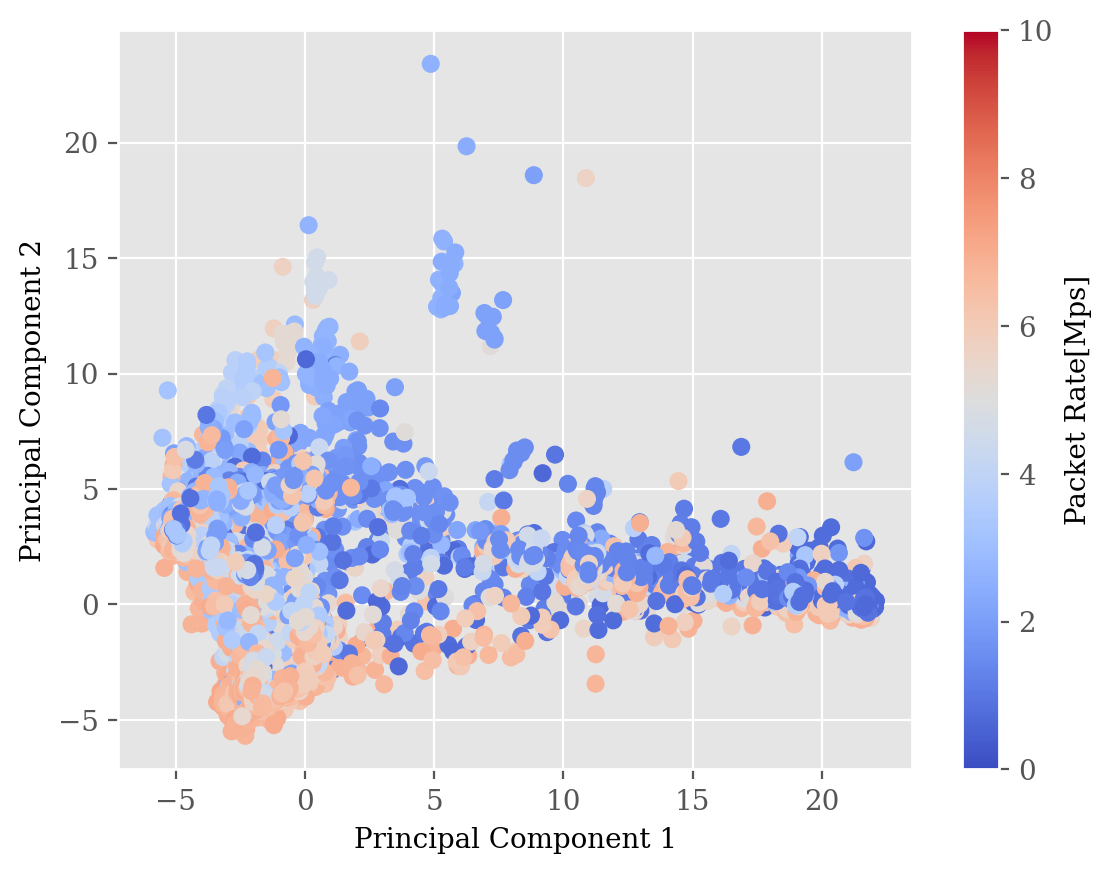

Eigenvectors:
 [[-0.1 -0.   0.2  0.2  0.2  0.1  0.2  0.2  0.2  0.2  0.1  0.2  0.1  0.1
   0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.   0.  -0.   0.   0.  -0.2
  -0.2 -0.2 -0.1 -0.2 -0.  -0.  -0.  -0.  -0.  -0.2 -0.2 -0.2 -0.1 -0.2
   0.2  0.2  0.2  0.1  0.2 -0.  -0.  -0.   0.  -0.  -0.2 -0.2 -0.1 -0.2
  -0.2 -0.2 -0.2 -0.1 -0.1 -0.2]
 [-0.2 -0.1 -0.1 -0.1 -0.  -0.2 -0.  -0.1 -0.1 -0.  -0.2 -0.  -0.2  0.1
   0.2  0.1  0.2 -0.2  0.1  0.2  0.1  0.2  0.2  0.2  0.2  0.2  0.2 -0.1
   0.  -0.1 -0.2  0.  -0.  -0.  -0.  -0.  -0.  -0.1  0.  -0.1 -0.2  0.
  -0.1 -0.1 -0.1 -0.1 -0.   0.1  0.2  0.1  0.2  0.1  0.   0.1  0.2  0.
  -0.1 -0.1  0.  -0.2 -0.2  0.1]]
Eigenvalues:
 [32.  10.8]
3.469446951953614e-18


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp


# Load CSV data into a Pandas dataframe
#df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
df = pd.read_csv("random_rates.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'input_rate'

independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col].div(1000)



# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
pca = PCA()
pca.n_components =2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=0, vmax=10)
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))
# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Packet Rate[Mps]')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'pca.png')
plt.savefig(file_path)
plt.show()


# Print the eigenvectors and eigenvalues with one decimal place
a = np.round(pca.components_, 1)
b=np.round(pca.explained_variance_, 1)
c=np.dot(pca.components_[0],pca.components_[1])
print("Eigenvectors:\n", np.round(pca.components_, 1))
print("Eigenvalues:\n", np.round(pca.explained_variance_, 1))
print(c)


dependent_variable:7123.5425162565
1362822
(21981, 5)
PCA explained variance ratio: [0.6913633  0.09286396]


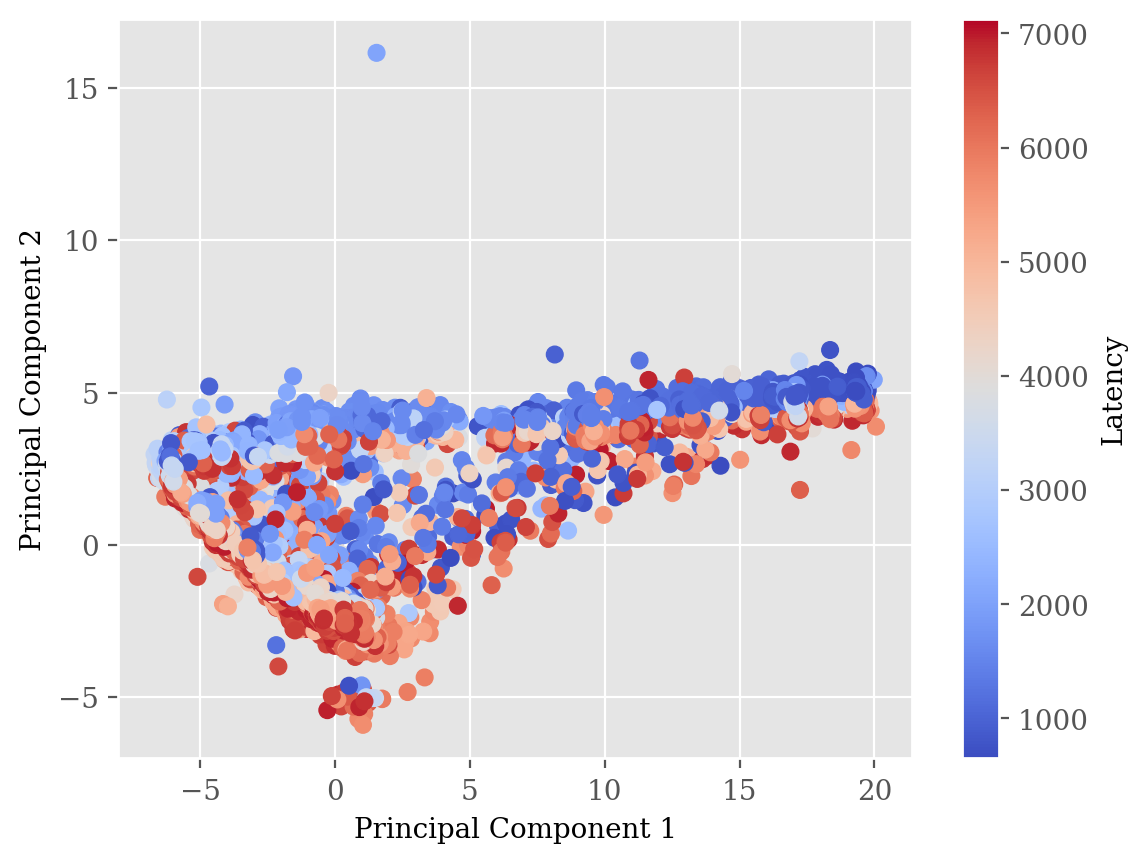

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler


# Load CSV data into a Pandas dataframe
df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
df = pd.read_csv("random_rates.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'input_rate'
#target_col = 'latency'
independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col]#.div(1000)


print(f'dependent_variable:{max(dependent_variable)}')



# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
# Create a Sparse PCA object with 2 components
spca = SparsePCA(n_components=5, alpha =1)


# Fit the Sparse PCA model to the data
spca.fit(independent_variables_scaled)

# Transform the data into the reduced-dimension representation
X_spca = spca.transform(independent_variables_scaled)

independent_variables_pca = spca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=min(df[target_col]), vmax=max(df[target_col]))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))


# Get the explained variance ratio
cov_matrix = np.cov(independent_variables_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("PCA explained variance ratio:", pca.explained_variance_ratio_)


# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Latency')





plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'pcalatency_alpha1.png')
plt.savefig(file_path)
plt.show()




dependent_variable:15000.0
5.878
15000.0
1362822
(21981, 2)


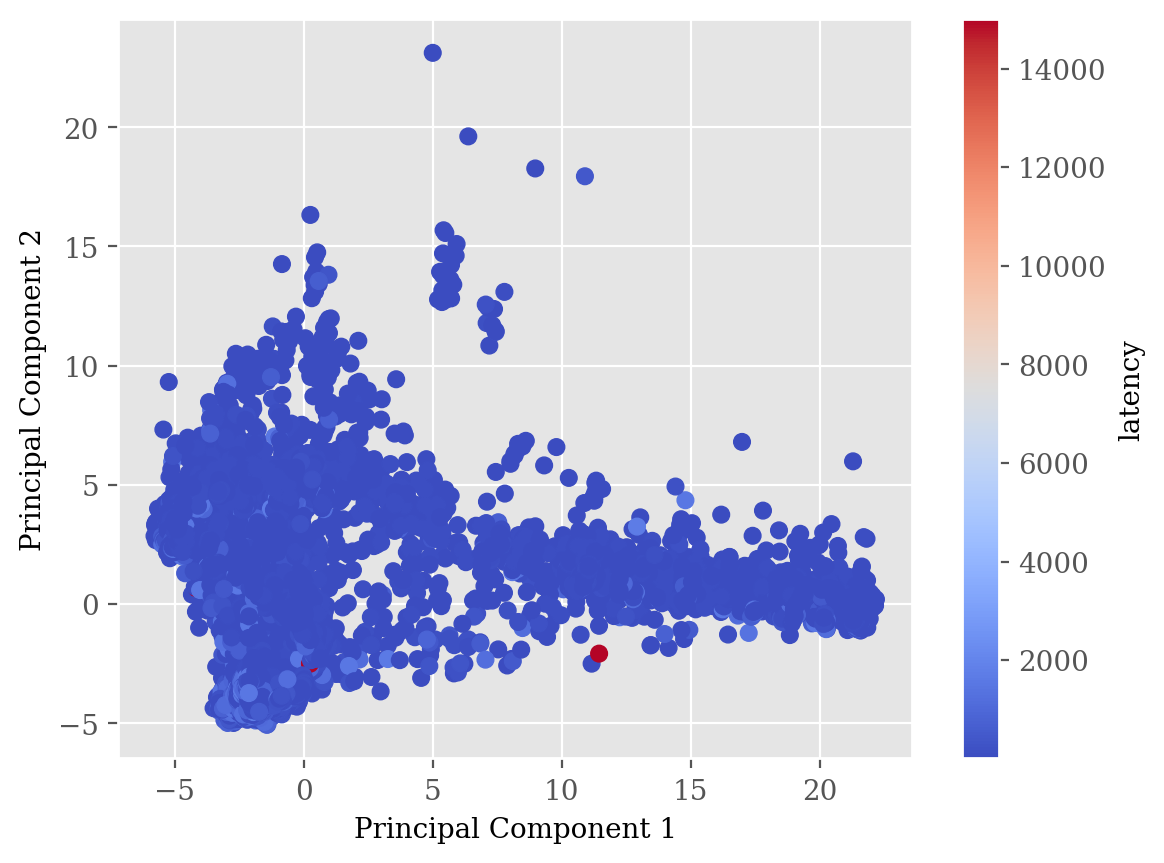

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp


# Load CSV data 
df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
df = pd.read_csv("random_rates.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'latency'

independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col]


print(f'dependent_variable:{max(dependent_variable)}')

print(min(df[target_col]))
print(max(df[target_col]))

# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
pca = PCA()
pca.n_components = 2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=min(df[target_col]), vmax=max(df[target_col]))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))

# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label(target_col)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.show()

# Cosine similarity (hierarchical clustering)

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Load your dataset into a Pandas dataframe
df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
df = pd.read_csv("random_rates.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)


# Standardize your data
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Fit a Gaussian mixture model to your data
gmm = GaussianMixture(n_components=5)
gmm.fit(X)

# Choose the two most informative features using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



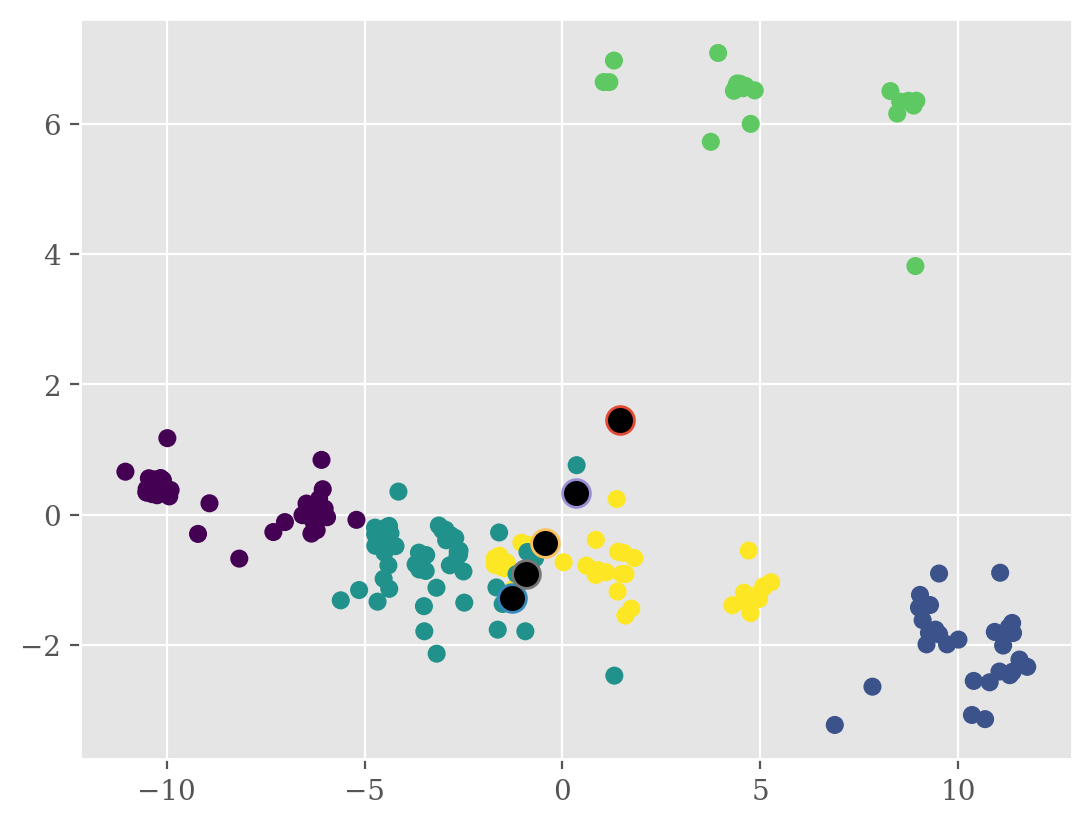

In [81]:
# Plot the data points
plt.scatter(X_pca[:,0], X_pca[:,1], c=gmm.predict(X))

# Plot the cluster centers
for i in range(5):
    center = gmm.means_[i]
    plt.plot(center[0], center[1], 'o', markerfacecolor='black', markersize=10)

# Add a legend
plt.show()


(178, 2)


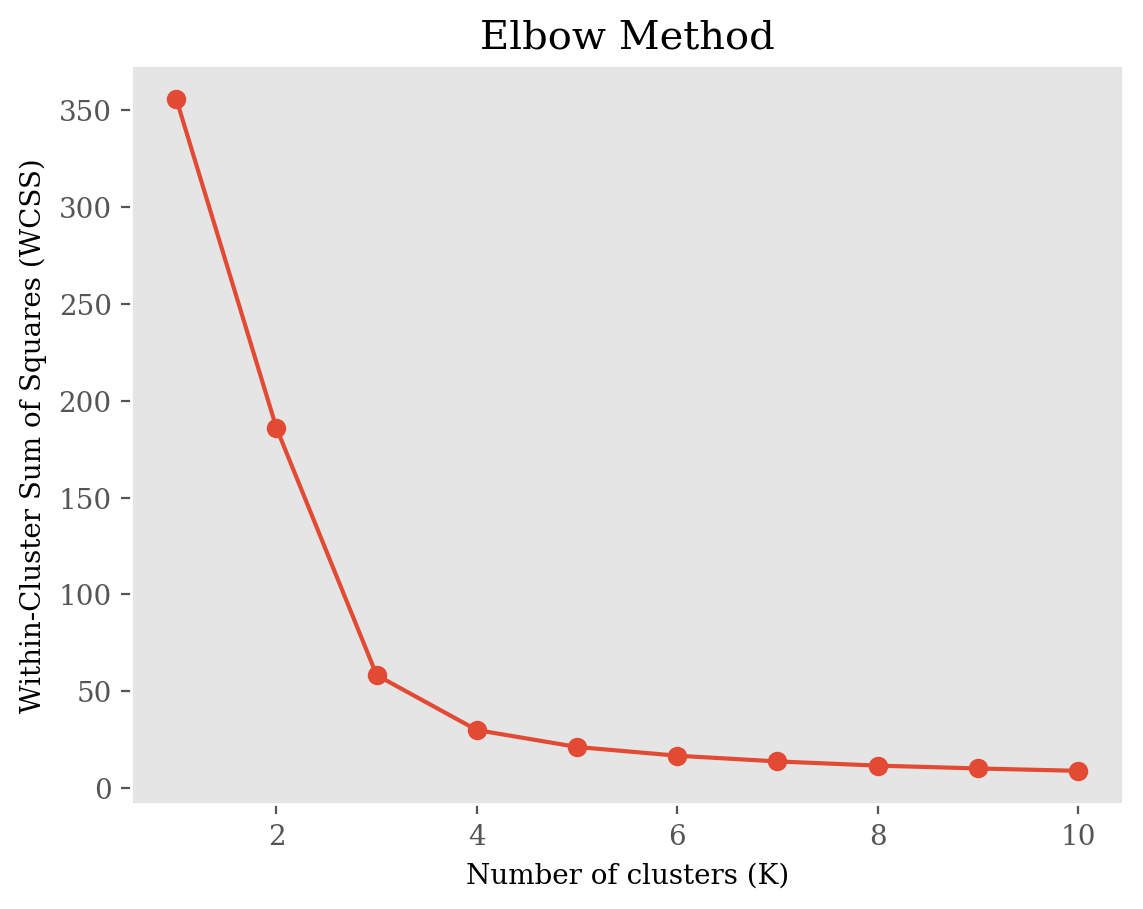

C:\Users\Qiong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.58


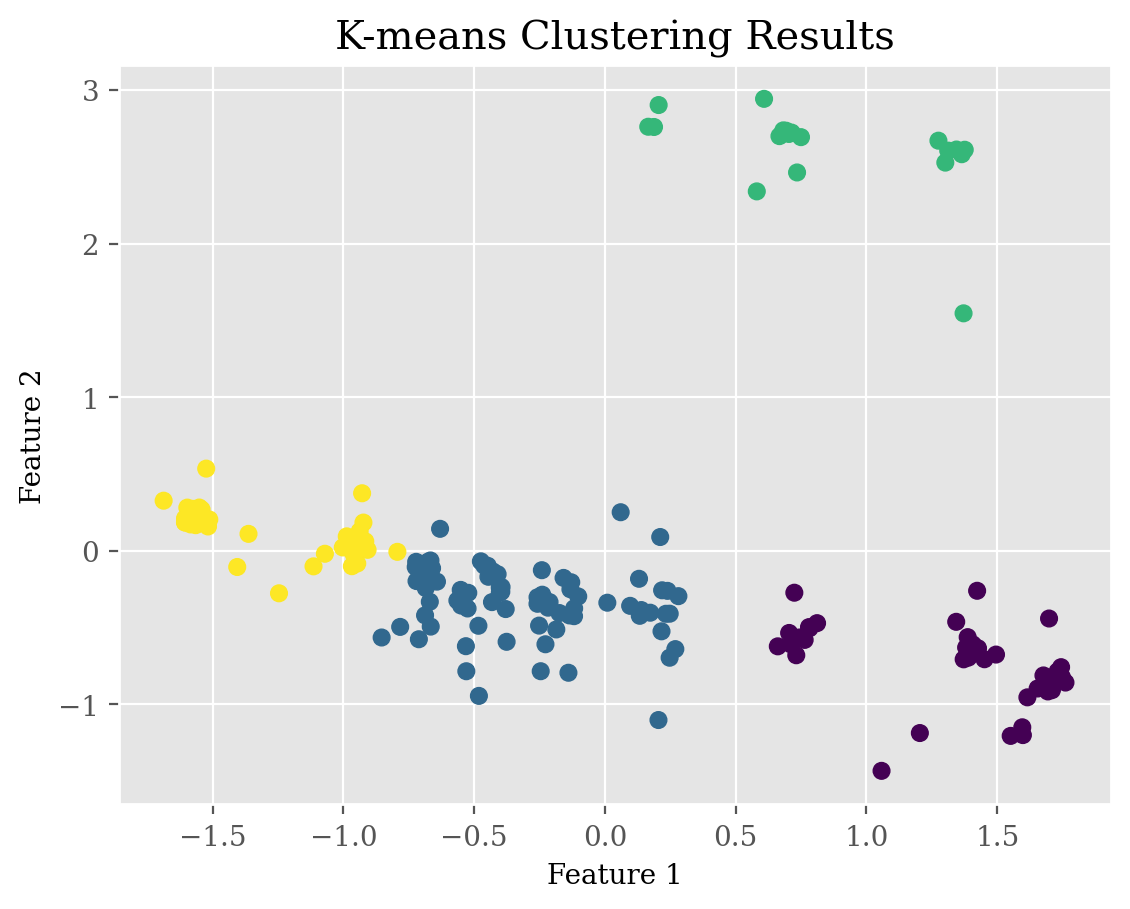

In [82]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load your dataset into a Pandas dataframe
df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)
# Choose the 5 columns of interest
selected_columns = [ 'input_rate','firewall_instructions']#, 'nf_router_instructions', 'ndpi_stats_instructions',
                    #'payload_scan_instructions','bridge_instructions']

# Create a new dataframe with the selected columns
new_df =  independent_variables_pca# df#[selected_columns]
# Standardize your data
scaler = StandardScaler()
X = scaler.fit_transform(new_df)
print(np.shape(X))

# Choose the number of clusters
wcss = []
max_clusters = 10  # You can choose a different maximum number of clusters

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS for the K-means model

plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid()
plt.show()

# Fit a K-means clustering model to your data
n_clusters =4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Predict the cluster labels for your data
labels = kmeans.predict(X)
labels = kmeans.labels_
data['Cluster'] = labels

# Evaluate the quality of the clustering
from sklearn.metrics import silhouette_score
print("Silhouette Score: {:.2f}".format(silhouette_score(X, labels)))


# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

# Decision tree

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [30]:
# Read the CSV file
df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
#df = pd.read_csv("random_rates.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)

# Separate the features and target variable
X = df.drop(['input_rate','output_rate'], axis=1)
X1 = df.drop(['input_rate','output_rate', 'nf_router_instructions',
             'ndpi_stats_instructions','payload_scan_instructions',
             'firewall_branches','ndpi_stats_branches','payload_scan_branches','bridge_branches'], axis=1)
y = df['input_rate']
# the size seems now enough
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=0)

# Initialize the regressor with optional hyperparameters (e.g., max_depth)
reg = DecisionTreeRegressor(random_state=0)
reg1 = DecisionTreeRegressor(random_state=0)
# Train the regressor on the training set
reg.fit(X_train, y_train)
reg1.fit(X1_train, y1_train)




DecisionTreeRegressor(random_state=0)

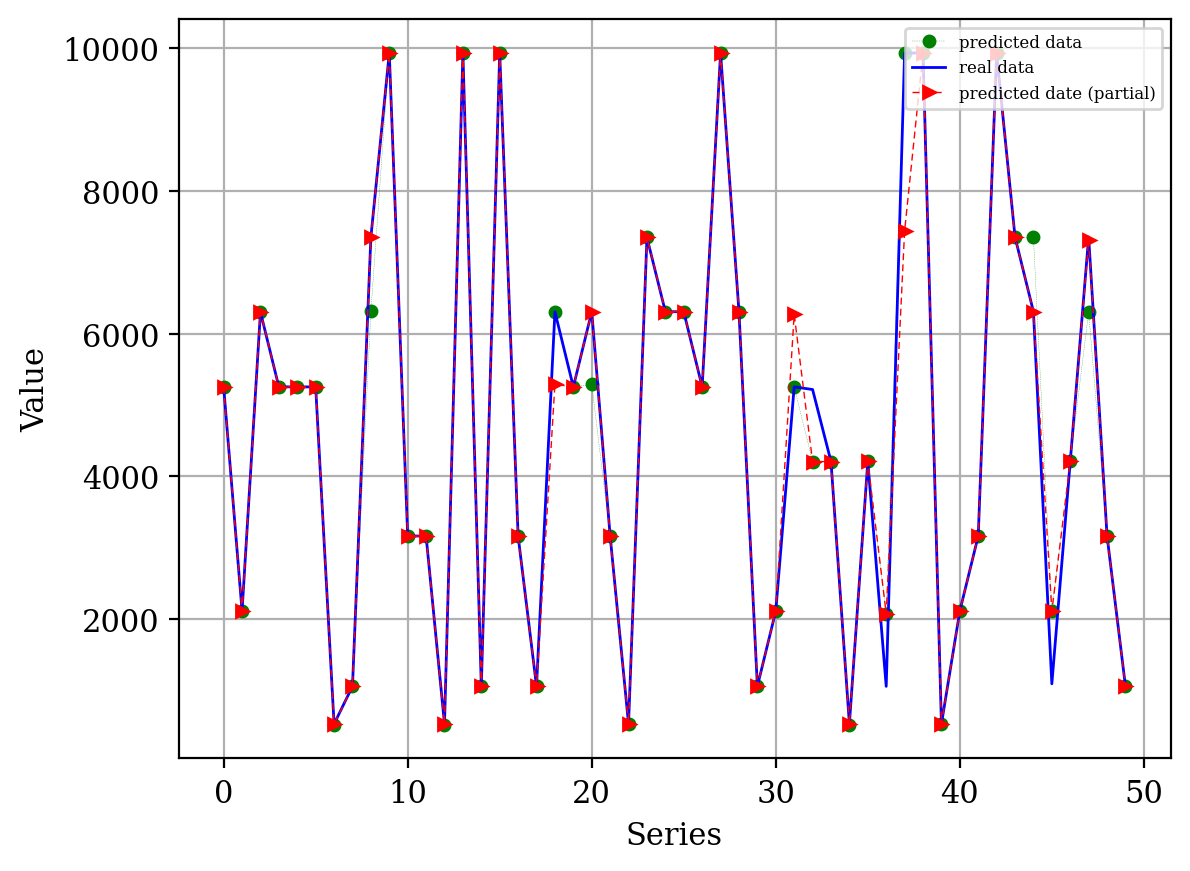

Accuracy within 5% threshold: 87.03703703703704
Accuracy within 5% threshold: 87.03703703703704


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the test set
y_pred = reg.predict(X_test)
y1_pred = reg1.predict(X1_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print("Mean Squared Error: {:.2f}".format(mse))
#print("R-squared: {:.2f}".format(r2))



plt.plot(y_pred[0:50], marker='o',markersize = 4, c='g',linestyle='-',linewidth=0.1, dashes=(5, 3),label='predicted data')
plt.plot(y_test[0:50].tolist(), linestyle='-',c='b',linewidth = 1,label='real data')
plt.plot(y1_pred[0:50], marker='>',markersize = 4,c='r',linestyle='-', linewidth=0.5, dashes=(5, 3),label='predicted date (partial)')


plt.legend(loc="upper right", fontsize=6)
plt.xlabel('Series')
plt.ylabel('Value')
plt.grid()

#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'predic_rate_random.png')
plt.savefig(file_path)
plt.show()

# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100


distances_parital = [abs(real - pred) / real for real, pred in zip(y_test, y1_pred)]
accuracy_within_threshold_partial = sum(dist <= threshold for dist in distances) / len(distances) * 100

# Print the accuracy within the threshold
print("Accuracy within 5% threshold:", accuracy_within_threshold)
print("Accuracy within 5% threshold:", accuracy_within_threshold_partial)

Mean Squared Error: 526211.75
R-squared: -1.04


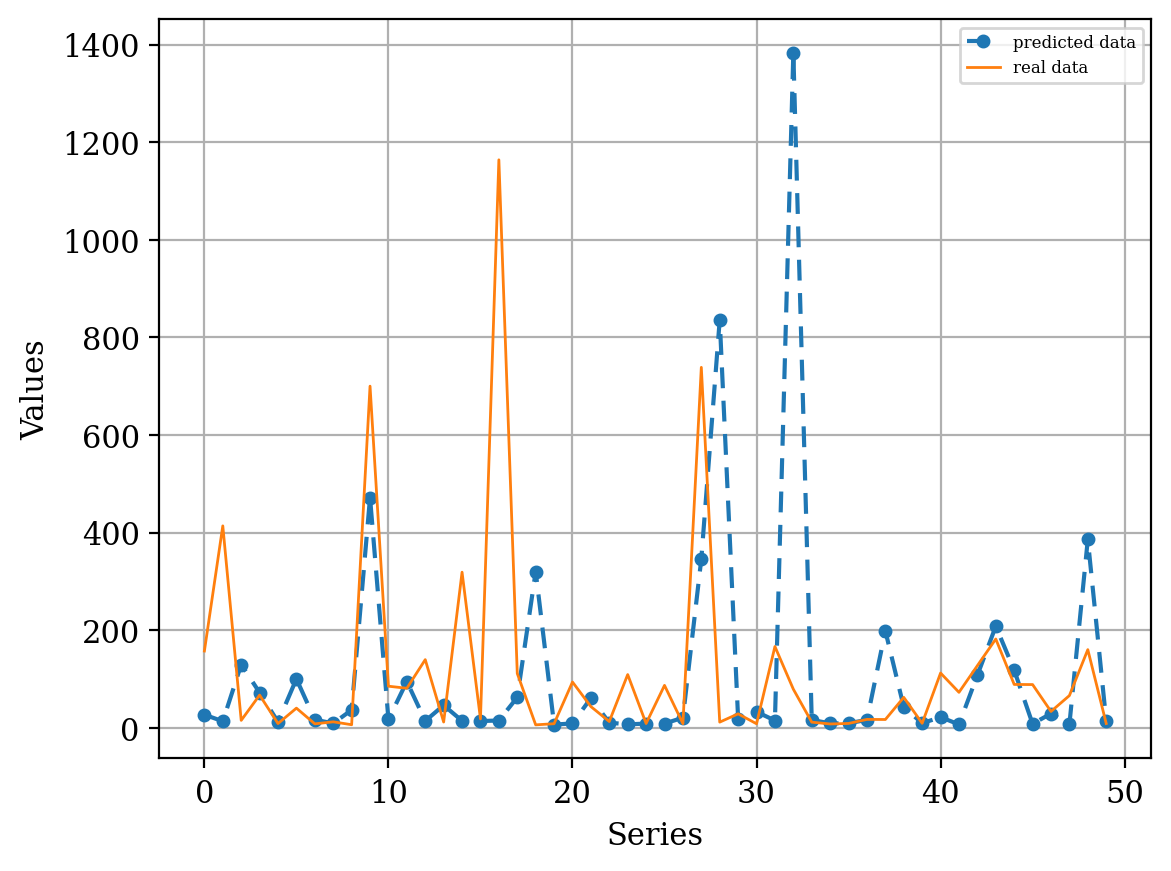

In [17]:
# Read the CSV file
# Load your dataset into a Pandas dataframe
#df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
df = pd.read_csv("random_rates.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)
# Choose the 5 columns of interest
selected_columns = [ 'input_rate','firewall_instructions', 'nf_router_instructions', 'ndpi_stats_instructions',
                    'payload_scan_instructions','bridge_instructions','latency']

# Create a new dataframe with the selected columns
new_df =  df[selected_columns]

# Separate the features and target variable
X = df.drop('latency', axis=1)  
y = df['latency']

# the size seems now enough
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# Initialize the regressor with optional hyperparameters (e.g., max_depth)
reg = DecisionTreeRegressor(random_state=0)

# Train the regressor on the training set
reg.fit(X_train, y_train)


# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

# Print the predicted target values and the actual target values for the test set
#print("Predicted values:", y_pred)
#print("Actual values:", y_test)
# r2_score: a number between 0 and 1, with higher values indicating a better fit.

plt.plot(y_pred[0:50], marker='o',markersize = 4, linestyle='-', dashes=(5, 3),label='predicted data')
plt.plot(y_test[0:50].tolist(), linestyle='-',linewidth = 1,label='real data')

plt.xlabel('Series')
plt.ylabel('Values')

plt.legend(loc="upper right", fontsize=6)
plt.grid()
#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'predic_lentency_random.png')
plt.savefig(file_path)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Example real data and predicted data
y_real = [10, 20, 30, 40, 50]
y_predicted = [11, 18, 35, 42, 47]

# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
distances = [abs(real - pred) / real for real, pred in zip(y_real, y_predicted)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100

# Print the accuracy within the threshold
print("Accuracy within 5% threshold:", accuracy_within_threshold)
